# problem statement

Description

The Global Power Plant Database is a comprehensive, open source database of power plants around the world. It centralizes power plant data to make it easier to navigate, compare and draw insights for one’s own analysis. The database covers approximately 35,000 power plants from 167 countries and includes thermal plants (e.g. coal, gas, oil, nuclear, biomass, waste, geothermal) and renewables (e.g. hydro, wind, solar). Each power plant is geolocated and entries contain information on plant capacity, generation, ownership, and fuel type. It will be continuously updated as data becomes available.

# importing the libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns
from scipy.stats import zscore


# loading the dataset

In [2]:
df=pd.read_csv("global_powerplant.csv")

In [3]:
df.head()

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source,estimated_generation_gwh
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,NaN,...,2019.0,NaN,617.789264,843.747,886.004428,663.774500,626.239128,NaN,Central Electricity Authority,NaN
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,NaN,...,2019.0,NaN,3035.550000,5916.370,6243.000000,5385.579736,7279.000000,NaN,Central Electricity Authority,NaN


In [4]:
df.shape

(907, 27)

the dataset contains 907 rows and 27 columns 

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 907 entries, 0 to 906
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   country                   907 non-null    object 
 1   country_long              907 non-null    object 
 2   name                      907 non-null    object 
 3   gppd_idnr                 907 non-null    object 
 4   capacity_mw               907 non-null    float64
 5   latitude                  861 non-null    float64
 6   longitude                 861 non-null    float64
 7   primary_fuel              907 non-null    object 
 8   other_fuel1               198 non-null    object 
 9   other_fuel2               1 non-null      object 
 10  other_fuel3               0 non-null      float64
 11  commissioning_year        527 non-null    float64
 12  owner                     342 non-null    object 
 13  source                    907 non-null    object 
 14  url       

In [8]:
df.isnull().sum()

country                       0
country_long                  0
name                          0
gppd_idnr                     0
capacity_mw                   0
latitude                     46
longitude                    46
primary_fuel                  0
other_fuel1                 709
other_fuel2                 906
other_fuel3                 907
commissioning_year          380
owner                       565
source                        0
url                           0
geolocation_source           19
wepp_id                     907
year_of_capacity_data       388
generation_gwh_2013         907
generation_gwh_2014         509
generation_gwh_2015         485
generation_gwh_2016         473
generation_gwh_2017         467
generation_gwh_2018         459
generation_gwh_2019         907
generation_data_source      458
estimated_generation_gwh    907
dtype: int64

in the database. columns contain large number of null values

we can see that columns other_fuel3 , generation_gwh_2013 , generation_gwh_2019 , estimated_generation_gwh contains all null values and column other_fuel2 contains only 1 value, so we can drop these columns

## dropping columns 

In [9]:
df.drop(['other_fuel2','other_fuel3','generation_gwh_2013','generation_gwh_2019','estimated_generation_gwh'],axis=1,inplace=True)

# checking datatypes of remaining columns

In [10]:
df.dtypes

country                    object
country_long               object
name                       object
gppd_idnr                  object
capacity_mw               float64
latitude                  float64
longitude                 float64
primary_fuel               object
other_fuel1                object
commissioning_year        float64
owner                      object
source                     object
url                        object
geolocation_source         object
wepp_id                   float64
year_of_capacity_data     float64
generation_gwh_2014       float64
generation_gwh_2015       float64
generation_gwh_2016       float64
generation_gwh_2017       float64
generation_gwh_2018       float64
generation_data_source     object
dtype: object

the dataset is a mixture of float and object datatypes

checking the unique values

In [12]:
df['country'].unique()

array(['IND'], dtype=object)

only 1 unique value

In [13]:
df['country_long'].unique()

array(['India'], dtype=object)

only 1 unique value

In [16]:
df['name'].unique()

array(['ACME Solar Tower', 'ADITYA CEMENT WORKS',
       'AES Saurashtra Windfarms', 'AGARTALA GT', 'AKALTARA TPP',
       'AKRIMOTA LIG', 'ALIYAR', 'ALLAIN DUHANGAN', 'ALMATTI DAM',
       'AMAR KANTAK', 'AMARAVATI TPP', 'ANANDPUR SAHIB ST-I&II',
       'ANAPARA "C"', 'ANDHRA', 'ANOOPGARH ST I&II', 'ANPARA', 'ANTA GT',
       'ANUPPUR', 'ANUPUR TPP', 'ARVINDNAGAR SUGAR', 'ASHOKNAGAR MILL',
       'ATHANI SUGAR', 'AURAIYA GT', 'AVANTHA BHANDAR TPP',
       'AWARPUR CEMENT PLANT', 'Abhijeet', 'Amarsar Solar Power Plant',
       'Anabura Wind Farm', 'Ananthapur - Meil Solar Power Plant',
       'Andrha Lake Wind Farm', 'Anikkadavu Wind Farm',
       'Arasinagundi Wind Farm', 'Askandra - DREPL Solar Power Plant',
       'Askandra - Electromech Maritech Solar Power Plant',
       'Askandra - Finehope Solar Power Plant',
       'Askandra - Khaya Solar Power Plant',
       'Askandra - Newton Solar Power Plant',
       'Askandra - Saidham Solar Power Plant',
       'Askandra - Vasavi Solar Po

In [17]:
df['gppd_idnr'].unique()

array(['WRI1020239', 'WRI1019881', 'WRI1026669', 'IND0000001',
       'IND0000002', 'IND0000003', 'IND0000004', 'IND0000005',
       'IND0000006', 'IND0000007', 'IND0000008', 'IND0000009',
       'IND0000010', 'IND0000011', 'IND0000012', 'IND0000013',
       'IND0000014', 'WRI1019996', 'IND0000015', 'WRI1019938',
       'WRI1019939', 'WRI1019904', 'IND0000016', 'IND0000017',
       'WRI1019940', 'WRI1020238', 'WRI1026104', 'WRI1026069',
       'WRI1026105', 'WRI1026768', 'WRI1026347', 'WRI1026068',
       'WRI1026106', 'WRI1026107', 'WRI1026108', 'WRI1026109',
       'WRI1026110', 'WRI1026111', 'WRI1026112', 'IND0000019',
       'WRI1019905', 'IND0000020', 'IND0000021', 'IND0000022',
       'IND0000023', 'IND0000025', 'IND0000024', 'WRI1019941',
       'WRI1019882', 'IND0000026', 'IND0000027', 'IND0000028',
       'IND0000029', 'IND0000030', 'IND0000031', 'IND0000032',
       'WRI1019883', 'IND0000033', 'IND0000034', 'IND0000035',
       'IND0000036', 'IND0000037', 'IND0000038', 'IND00

In [18]:
df['capacity_mw'].unique()

array([2.50000e+00, 9.80000e+01, 3.92000e+01, 1.35000e+02, 1.80000e+03,
       2.50000e+02, 6.00000e+01, 1.92000e+02, 2.90000e+02, 2.10000e+02,
       1.35000e+03, 1.34000e+02, 1.20000e+03, 1.69500e+01, 9.00000e+00,
       2.63000e+03, 4.19330e+02, 6.00000e+02, 1.00000e+01, 1.70000e+01,
       2.40000e+01, 6.52000e+02, 4.60000e+01, 5.00000e+01, 1.00000e+00,
       1.65000e+01, 1.13600e+02, 1.98000e+01, 1.32000e+01, 5.00000e+00,
       7.05000e+02, 2.80000e+01, 4.50000e+02, 1.80000e+02, 1.05000e+03,
       5.10000e+02, 6.75000e+01, 3.00000e+02, 3.35000e+02, 1.20000e+01,
       3.15000e+02, 3.00000e+01, 2.00000e+01, 4.20000e+01, 7.20000e+02,
       9.00000e+01, 1.32000e+03, 1.20000e+02, 6.60000e+01, 2.70000e+02,
       2.28000e+01, 1.50000e+01, 2.52000e+01, 1.80000e+01, 1.70000e+03,
       2.60000e+01, 4.10000e+01, 1.37900e+03, 3.40000e+01, 1.60000e+01,
       5.00000e+02, 8.00000e+01, 7.50000e+01, 1.21000e+03, 9.90000e+01,
       6.96000e+01, 6.00000e+00, 7.50000e+02, 4.00000e+01, 1.650

In [19]:
df['latitude'].unique()

array([28.1839, 24.7663, 21.9038, 23.8712, 21.9603, 23.7689, 10.4547,
       32.2258, 16.33  , 23.1642, 21.0782, 31.2717, 24.2007, 31.2412,
           nan, 24.201 , 25.1797, 23.0666, 23.0655, 18.0845, 19.5867,
       16.7708, 26.6282, 21.7438, 19.7881, 28.3615, 14.5751, 14.9455,
       18.858 , 10.7245, 14.4791, 27.3473, 27.36  , 27.3632, 27.3661,
       27.3537, 27.3504, 27.3566, 28.506 , 16.2804, 33.1815, 32.8063,
       23.8285, 18.1396, 19.8601, 24.6929, 22.3421, 22.9956, 32.1686,
       24.1917, 24.223 , 23.6026, 21.9114, 23.807 , 25.3999, 22.9417,
       25.4865, 28.4723, 27.8453, 13.1021, 31.4306, 31.9546, 17.3816,
       20.805 , 16.6505, 16.2774, 15.1831, 15.1777, 15.1932, 13.7008,
       13.8274, 31.4107, 21.232 , 21.0813, 19.5555, 18.1012, 19.5132,
       21.5837, 11.331 , 11.2428, 11.3842, 18.2416, 21.184 , 18.455 ,
       18.4426, 18.9368, 21.0483, 25.2267, 24.2508, 23.3172, 24.8263,
       22.0103, 32.1121, 23.3256, 23.6783, 23.785 , 26.5145, 21.2083,
        9.9975, 10.0

In [20]:
df['longitude'].unique()

array([73.2407, 74.609 , 69.3732, 91.3602, 82.4091, 68.6447, 77.0078,
       77.207 , 75.8863, 81.6373, 77.9009, 76.4938, 82.8   , 77.8769,
           nan, 82.7891, 76.3188, 81.7841, 81.7865, 76.1851, 74.7061,
       74.9191, 79.5286, 83.2741, 79.1518, 74.2402, 76.3926, 77.687 ,
       73.6396, 77.1893, 76.3482, 71.6917, 71.6918, 71.6916, 77.3066,
       75.225 , 75.3155, 76.1418, 87.4513, 82.1221, 79.3421, 74.689 ,
       82.4305, 88.4042, 76.4695, 81.2875, 81.2747, 74.2562, 83.1889,
       91.565 , 86.0218, 79.925 , 85.7452, 79.8066, 73.2   , 80.2682,
       78.241 , 76.7986, 74.5345, 79.0547, 74.8209, 74.7111, 76.7909,
       77.1036, 76.7195, 75.6373, 75.7131, 76.4328, 79.6311, 79.7708,
       73.8087, 73.7252, 73.4173, 72.2222, 77.758 , 77.8659, 77.7145,
       74.7529, 81.4237, 73.3907, 73.3498, 73.4527, 75.8425, 74.6216,
       78.1606, 78.1336, 73.0901, 83.2058, 76.6537, 81.0333, 86.0888,
       85.88  , 90.5287, 74.1543, 76.3744, 88.14  , 76.532 , 78.9535,
       78.9333, 76.1

In [21]:
df['primary_fuel'].unique()

array(['Solar', 'Coal', 'Wind', 'Gas', 'Hydro', 'Biomass', 'Oil',
       'Nuclear'], dtype=object)

8 unique values

In [22]:
df['other_fuel1'].unique()

array([nan, 'Oil', 'Cogeneration', 'Gas'], dtype=object)

3 unique values

In [23]:
df['commissioning_year'].unique()

array([2011.,   nan, 2004., 2015., 2005., 1970., 2010., 2008., 2014.,
       1985., 1986., 1987., 2000., 1989., 2017., 1977., 1980., 2003.,
       1984., 1976., 1996., 1991., 2002., 2001., 2006., 2007., 1988.,
       1973., 2012., 1968., 1964., 2016., 2013., 1962., 1998., 1993.,
       1997., 1999., 1994., 1975., 1992., 1972., 1979., 1967., 1995.,
       1983., 1981., 2018., 1959., 1961., 1957., 1978., 1963., 1971.,
       1955., 2009., 1966., 1965., 1960., 1949., 1952., 1990., 1982.,
       1937., 1956., 1946., 1958., 1943., 1954., 1969., 1939., 1927.,
       1974., 1953.])

In [24]:
df['owner'].unique()

array(['Solar Paces', 'Ultratech Cement ltd', 'AES', nan,
       'Hindustan Pvt lt', 'Dr Ssk ltd', 'Ashok Ssk ltd',
       'Shree Sugars ltd', 'Ener-t International Ltd.',
       'Nav Bharat Buildcon Private Limited', 'MEIL Green Power Limited',
       'Madras Cement Limited',
       'DDE Renewable Energy Private Limited (DREPL)',
       'Electromech Maritech Private Limited',
       'Finehope Allied Engineering Private Limited',
       'Khaya Solar Projects Private Limited',
       'Newton Solar Private Limited', 'Saidham Overseas Private Limited',
       'Vasavi Solar Power Private Limited', 'Indian Power ltd',
       'Ballarpur Industries ltd', 'Jk Cement ltd', 'India Ltd icl)',
       'Bharat Petroleum Corporation Limited', 'Bhilwara Energy Limited',
       'Ideal Projects ltd', 'Ugar Works ltd', 'Vishwanath Sugars ltd',
       'Hothur Pvt ltd', 'Janki Corp ltd', 'Mysore Mills ltd',
       'Sunflag Co ltd', 'Varam Pvt ltd', 'Sangam Spinners ltd',
       'Bharat Refinery ltd', 'Bina

In [25]:
df['source'].unique()

array(['National Renewable Energy Laboratory', 'Ultratech Cement ltd',
       'CDM', 'Central Electricity Authority', 'Hindustan Pvt lt',
       'Dr Ssk ltd', 'Ashok Ssk ltd', 'Shree Sugars ltd', 'Navbharat',
       'Meil.In/P', 'Lancosola', 'Indian Power ltd',
       'Ballarpur Industries ltd', 'Jk Cement ltd', 'India Ltd icl)',
       'Ideal Projects ltd', 'Ugar Works ltd', 'Vishwanath Sugars ltd',
       'Hothur Pvt ltd', 'Janki Corp ltd', 'Mysore Mills ltd',
       'Sunflag Co ltd', 'Varam Pvt ltd', 'Sangam Spinners ltd',
       'Bharat Refinery ltd', 'Binani Industries ltd',
       'Indo Synthetics ltd', 'Ambed K Sugar', 'AES Winfra', 'Sembcorp',
       'Punj Lloyd', 'Hiraco India', 'Moserbaer Solar', 'Lingandwi',
       'LEPL', 'CleanEnerg teLeanenergy', 'Adani Power Limite r Er',
       'Madhav Group', 'Power Private edM/Pdf', 'Acc Acc ltd',
       'Birla Corp ltd', 'Hindustan Zinc ltd', 'Gupta Ltd gepl)',
       'Manikghar Cement co', 'Core Fuels ltd',
       'Maharashtra State

In [27]:
df['url'].unique()

array(['http://www.nrel.gov/csp/solarpaces/project_detail.cfm/projectID=262',
       'http://www.ultratechcement.com/',
       'https://cdm.unfccc.int/Projects/DB/DNV-CUK1328700673.83/view',
       'http://www.cea.nic.in/', 'http://www.hindustanpowerprojects.com/',
       'http://www.ambedkarsugar.com/',
       'http://www.mapsofindia.com/whitepages/foods-and-beverages/food-processors-and-manufacturers/ashokssklimited',
       'http://www.renukasugars.com/',
       'http://www.nrel.gov/csp/solarpaces/project_detail.cfm/projectID=254',
       'http://www.navbharatbuildcon.com/windmill--solar-plant.html',
       'https://cdm.unfccc.int/Projects/DB/DNV-CUK1216117082.43/view',
       'http://www.meil.in/power-projects',
       'https://cdm.unfccc.int/Projects/DB/LRQA%20Ltd1348755977.79/view',
       'https://cdm.unfccc.int/Projects/DB/BVQI1379744232.36/viewhttps://cdm.unfccc.int/Projects/DB/LRQA%20Ltd1278588174.29/view',
       'http://www.lancosolar.com/pdfs/rajasthan-pv-project-details.p

In [28]:
df['geolocation_source'].unique()

array(['National Renewable Energy Laboratory', 'WRI', nan,
       'Industry About'], dtype=object)

3 unique values

In [29]:
df['wepp_id'].unique()

array([nan])

In [31]:
df['year_of_capacity_data'].unique()

array([  nan, 2019.])

In [32]:
df['generation_gwh_2014'].unique()

array([           nan, 6.17789264e+02, 3.03555000e+03, 1.15342100e+03,
       1.57558250e+02, 6.74391100e+02, 4.80594950e+02, 1.88790400e+03,
       1.92097100e+03, 6.14412500e+02, 7.74400000e+03, 9.67087900e+03,
       1.61198700e+03, 1.60700000e+03, 0.00000000e+00, 2.93600000e+03,
       2.92521045e+03, 7.92686650e+02, 7.23528100e+03, 1.33253385e+03,
       9.46141000e+02, 1.07595320e+03, 8.56595500e+01, 1.20444750e+02,
       2.65780000e+02, 3.04832800e+02, 4.95967700e+02, 1.22100000e+03,
       5.05760000e+02, 1.25573200e+03, 2.85387000e+00, 1.24631710e+03,
       2.93534950e+02, 5.44576300e+03, 5.03370500e+01, 5.24180925e+03,
       6.50730000e+01, 1.36872200e+02, 6.75605000e+01, 2.96272000e+03,
       8.32884650e+02, 9.07937500e+01, 2.99176600e+02, 5.85507000e+03,
       2.23699080e+03, 1.43887000e+03, 8.11580000e+00, 1.45560000e+02,
       5.37195000e+03, 2.34650850e+02, 3.30595670e+03, 3.73919000e+02,
       1.49121645e+03, 2.53904100e+03, 1.01567610e+03, 4.48805700e+03,
      

In [33]:
df['generation_gwh_2015'].unique()

array([           nan, 8.43747000e+02, 5.91637000e+03, 1.20885200e+03,
       1.52195200e+02, 7.21335200e+02, 1.44434200e+02, 1.64304600e+03,
       5.62966300e+03, 6.65197300e+02, 8.07681050e+03, 1.11510695e+04,
       9.09000000e+02, 2.70282320e+03, 1.46500000e+03, 9.86247350e+02,
       2.01300000e+03, 2.98513930e+03, 5.53220000e+01, 7.41862050e+02,
       5.97912500e+03, 1.43795470e+03, 6.18909900e+02, 1.96760200e+02,
       9.48831000e+02, 5.71607600e+02, 1.06942600e+02, 3.96806000e+01,
       2.31610720e+03, 2.31626436e+02, 0.00000000e+00, 3.26459500e+02,
       4.05600000e+03, 3.06379000e+02, 1.16531800e+03, 8.29591247e+00,
       1.29797750e+03, 3.14320500e+02, 5.74131900e+03, 3.98796000e+01,
       5.86315690e+03, 8.21372500e+01, 6.99485000e+00, 5.65160000e+00,
       1.55727450e+02, 3.26358400e+03, 6.37138300e+02, 7.35006500e+01,
       1.95935400e+02, 7.50597200e+03, 1.20406750e+03, 2.80500000e-01,
       1.63427400e+03, 1.06579200e+02, 1.28899000e+01, 3.41720000e+00,
      

In [34]:
df['generation_gwh_2016'].unique()

array([           nan, 8.86004428e+02, 6.24300000e+03, 1.17576500e+03,
       6.14213500e+01, 6.75724400e+02, 4.02029750e+02, 1.33809300e+03,
       1.70100800e+03, 6.70500650e+02, 7.90202160e+03, 1.32273523e+04,
       6.66420000e+02, 3.51574960e+03, 5.09000000e+02, 2.83200000e+02,
       1.51100000e+03, 2.17363720e+03, 1.75018510e+03, 6.65983350e+02,
       6.34120200e+03, 2.80000000e+03, 9.96373100e+02, 1.29033000e+03,
       1.66863100e+03, 1.23282490e+03, 1.09181350e+02, 5.32126000e+01,
       6.77378800e+03, 1.87193669e+02, 1.20903640e+02, 4.43242650e+02,
       7.17700000e+03, 3.54900000e+02, 1.27499900e+03, 1.04689800e+01,
       1.33603625e+03, 2.96271200e+02, 0.00000000e+00, 5.99932000e+03,
       2.69247000e+01, 5.14242865e+03, 4.68844000e+01, 4.99230000e+01,
       1.97308500e+01, 1.73826500e+01, 2.04870500e+01, 3.37910050e+03,
       9.46871850e+02, 1.01072100e+02, 2.05557050e+02, 5.66607190e+03,
       7.39155400e+02, 1.91560000e+02, 1.27252000e+03, 5.11710000e+00,
      

In [35]:
df['generation_gwh_2017'].unique()

array([           nan, 6.63774500e+02, 5.38557974e+03, 1.14791300e+03,
       8.96296000e+01, 6.79594950e+02, 4.39372100e+02, 1.56345700e+03,
       4.35055800e+03, 6.44570950e+02, 7.94074000e+03, 1.53348763e+04,
       4.30000000e+02, 5.77712000e+03, 3.57000000e+02, 5.40290000e+02,
       1.39500000e+03, 2.49417645e+03, 1.81284025e+03, 6.38521350e+02,
       6.77925600e+03, 2.12068000e+03, 1.46980405e+03, 2.01879000e+03,
       1.71320100e+03, 5.42643150e+02, 5.58394000e+01, 6.84560000e+01,
       6.15376000e+03, 1.78106690e+02, 3.47098000e+01, 1.58254750e+02,
       8.77800000e+03, 1.71355000e+02, 1.43607200e+03, 5.85771000e+00,
       1.32996675e+03, 3.13594150e+02, 0.00000000e+00, 3.73840000e+03,
       1.56115500e+01, 5.10834990e+03, 4.23372500e+01, 4.32135000e+02,
       3.74319000e+01, 1.68752000e+01, 3.59090000e+03, 8.87838500e+02,
       9.66642500e+01, 3.05664000e+02, 6.15962100e+03, 2.26547000e+03,
       5.46795000e+02, 2.75796180e+03, 4.93548800e+02, 1.54500000e+03,
      

In [36]:
df['generation_gwh_2018'].unique()

array([           nan, 6.26239128e+02, 7.27900000e+03, 9.76655000e+02,
       4.83271500e+01, 5.79318850e+02, 4.06377900e+02, 1.48788000e+03,
       3.71715400e+03, 4.25641100e+02, 7.87397300e+03, 1.86976559e+04,
       5.28280000e+02, 6.24180100e+03, 5.21000000e+02, 0.00000000e+00,
       1.26800000e+03, 2.27969425e+03, 1.84862045e+03, 3.64836650e+02,
       6.52664500e+03, 2.55300000e+03, 1.72354895e+03, 1.94495000e+03,
       1.16634200e+03, 5.75458250e+02, 3.69045500e+01, 8.48934000e+01,
       6.34482000e+03, 1.73720000e+02, 4.01506167e+01, 3.54409050e+02,
       9.33400000e+03, 1.33912800e+02, 1.17900700e+03, 5.60000000e-02,
       1.26920210e+03, 2.50302200e+02, 3.78775000e+03, 5.49339500e+01,
       4.21699905e+03, 5.61578000e+01, 4.67430000e+02, 7.67742000e+01,
       3.38897000e+01, 6.98490000e+01, 3.13930800e+03, 9.05241050e+02,
       9.40971500e+01, 3.14320500e+02, 6.14642200e+03, 2.29963000e+03,
       1.29485400e+03, 2.75010000e+03, 5.67610000e+02, 2.57406200e+03,
      

In [38]:
df['generation_data_source'].unique()

array([nan, 'Central Electricity Authority'], dtype=object)

In [52]:
df['source'].unique()

array(['National Renewable Energy Laboratory', 'Ultratech Cement ltd',
       'CDM', 'Central Electricity Authority', 'Hindustan Pvt lt',
       'Dr Ssk ltd', 'Ashok Ssk ltd', 'Shree Sugars ltd', 'Navbharat',
       'Meil.In/P', 'Lancosola', 'Indian Power ltd',
       'Ballarpur Industries ltd', 'Jk Cement ltd', 'India Ltd icl)',
       'Ideal Projects ltd', 'Ugar Works ltd', 'Vishwanath Sugars ltd',
       'Hothur Pvt ltd', 'Janki Corp ltd', 'Mysore Mills ltd',
       'Sunflag Co ltd', 'Varam Pvt ltd', 'Sangam Spinners ltd',
       'Bharat Refinery ltd', 'Binani Industries ltd',
       'Indo Synthetics ltd', 'Ambed K Sugar', 'AES Winfra', 'Sembcorp',
       'Punj Lloyd', 'Hiraco India', 'Moserbaer Solar', 'Lingandwi',
       'LEPL', 'CleanEnerg teLeanenergy', 'Adani Power Limite r Er',
       'Madhav Group', 'Power Private edM/Pdf', 'Acc Acc ltd',
       'Birla Corp ltd', 'Hindustan Zinc ltd', 'Gupta Ltd gepl)',
       'Manikghar Cement co', 'Core Fuels ltd',
       'Maharashtra State

we can drop columns generation_data_source, generation_data_source, wepp_id

In [39]:
df.drop(['generation_data_source','generation_data_source','wepp_id'],axis=1, inplace=True)

In [44]:
df.drop(['country','country_long'],axis=1, inplace=True)

In [45]:
df.dtypes

name                      object
gppd_idnr                 object
capacity_mw              float64
latitude                 float64
longitude                float64
primary_fuel              object
other_fuel1               object
commissioning_year       float64
owner                     object
source                    object
url                       object
geolocation_source        object
year_of_capacity_data    float64
generation_gwh_2014      float64
generation_gwh_2015      float64
generation_gwh_2016      float64
generation_gwh_2017      float64
generation_gwh_2018      float64
dtype: object

In [53]:
df.isnull().sum()

name                       0
gppd_idnr                  0
capacity_mw                0
latitude                  46
longitude                 46
primary_fuel               0
other_fuel1                0
commissioning_year       380
owner                    565
source                     0
url                        0
geolocation_source         0
year_of_capacity_data    388
generation_gwh_2014      509
generation_gwh_2015      485
generation_gwh_2016      473
generation_gwh_2017      467
generation_gwh_2018      459
dtype: int64

# removal of null values using Simple Imputer

In [48]:
from sklearn.impute import SimpleImputer
imp=SimpleImputer(missing_values=np.NaN,strategy="most_frequent")

In [49]:
l=['geolocation_source','primary_fuel','other_fuel1']

In [ ]:
for i in l:
    df[i]=imp.fit_transform(df[i].values.reshape(-1,1))

the url column is of no value so we can drop it

In [54]:
df.drop(['url'],axis=1,inplace=True)

In [56]:
df['owner']=imp.fit_transform(df['owner'].values.reshape(-1,1))

In [58]:
df.isnull().sum()

name                       0
gppd_idnr                  0
capacity_mw                0
latitude                  46
longitude                 46
primary_fuel               0
other_fuel1                0
commissioning_year       380
owner                      0
source                     0
geolocation_source         0
year_of_capacity_data    388
generation_gwh_2014      509
generation_gwh_2015      485
generation_gwh_2016      473
generation_gwh_2017      467
generation_gwh_2018      459
dtype: int64

we will use the mean strategy for removal of null values of datatype float64

In [61]:
imp=SimpleImputer(missing_values=np.NaN,strategy="mean")

In [62]:
l=['latitude','longitude','commissioning_year','year_of_capacity_data','generation_gwh_2014','generation_gwh_2015','generation_gwh_2016','generation_gwh_2017','generation_gwh_2018']

In [63]:
for i in l:
    df[i]=imp.fit_transform(df[i].values.reshape(-1,1))

In [64]:
df.isnull().sum()

name                     0
gppd_idnr                0
capacity_mw              0
latitude                 0
longitude                0
primary_fuel             0
other_fuel1              0
commissioning_year       0
owner                    0
source                   0
geolocation_source       0
year_of_capacity_data    0
generation_gwh_2014      0
generation_gwh_2015      0
generation_gwh_2016      0
generation_gwh_2017      0
generation_gwh_2018      0
dtype: int64

the null values have been replaced and removed

In [65]:
df['name'].nunique()

907

In [67]:
df['gppd_idnr'].nunique()

907

In [68]:
df['commissioning_year'].nunique()

74

In [69]:
df['owner'].nunique()

280

In [70]:
df['source'].nunique()

191

In [71]:
df['year_of_capacity_data'].nunique()

1

In [72]:
df['geolocation_source'].nunique()

3

In [74]:
df['generation_gwh_2014'].nunique()

372

In [75]:
df['generation_gwh_2017'].nunique()

409

we will further drop name and gppd_idnr because it contains 907 unique values

In [76]:
df.drop(['name','gppd_idnr'],axis=1, inplace=True)

In [77]:
df.dtypes

capacity_mw              float64
latitude                 float64
longitude                float64
primary_fuel              object
other_fuel1               object
commissioning_year       float64
owner                     object
source                    object
geolocation_source        object
year_of_capacity_data    float64
generation_gwh_2014      float64
generation_gwh_2015      float64
generation_gwh_2016      float64
generation_gwh_2017      float64
generation_gwh_2018      float64
dtype: object

# visualisation

<AxesSubplot:xlabel='primary_fuel', ylabel='count'>

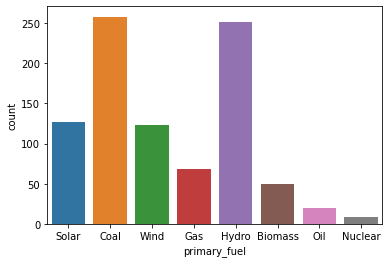

In [79]:
sns.countplot(df["primary_fuel"])

the maximum used primary fuel for electricity generation is coal and hydro fuel

<AxesSubplot:xlabel='other_fuel1', ylabel='count'>

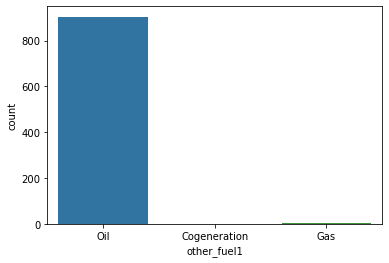

In [80]:
sns.countplot(df["other_fuel1"])

maximum another energy source used in primary electricity generation is oil

In [83]:
df['other_fuel1'].value_counts()

Oil             904
Gas               2
Cogeneration      1
Name: other_fuel1, dtype: int64

<AxesSubplot:ylabel='Density'>

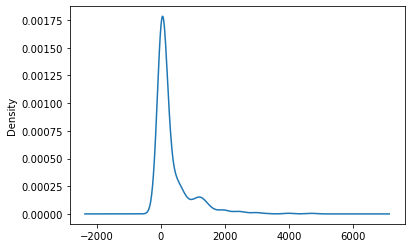

In [84]:
df["capacity_mw"].plot(kind='density')

<AxesSubplot:ylabel='Density'>

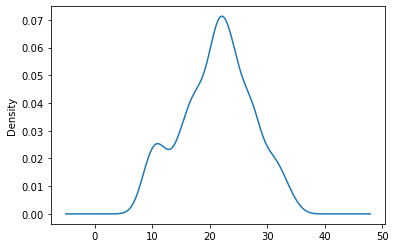

In [86]:
df["latitude"].plot(kind='density')

the maximum latitude value is between 18 to 28, this means that the power plant have latitudinal value between this range 

<AxesSubplot:ylabel='Density'>

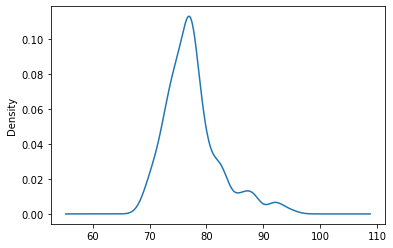

In [87]:
df["longitude"].plot(kind='density')

the maximum longitude value is between 74 to 80, this means that the power plant have longitudinal value between this range 

<AxesSubplot:ylabel='Density'>

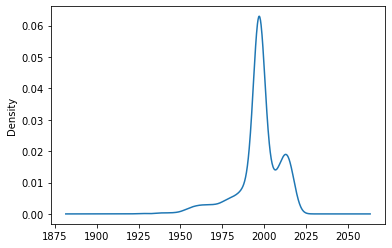

In [88]:
df["commissioning_year"].plot(kind='density')

<AxesSubplot:xlabel='commissioning_year'>

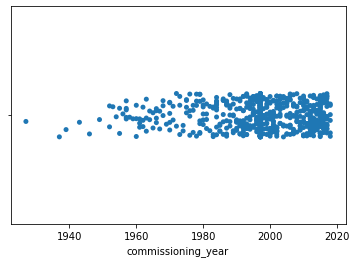

In [89]:
sns.stripplot(df["commissioning_year"])

the maximum comissioning year is between 1990 to 2020

<AxesSubplot:xlabel='year_of_capacity_data', ylabel='count'>

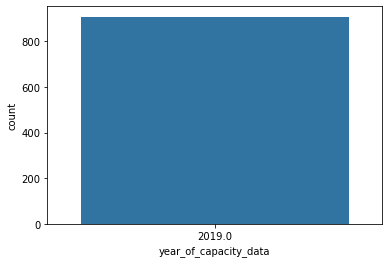

In [92]:
sns.countplot(df["year_of_capacity_data"])

the information were reported only in 2019, so we can drop it

In [93]:
df.drop(["year_of_capacity_data"],axis=1,inplace=True)

<AxesSubplot:ylabel='Density'>

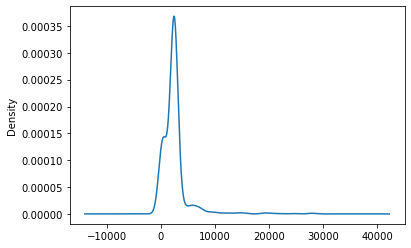

In [94]:
df["generation_gwh_2014"].plot(kind='density')

(array([800.,  55.,  30.,   6.,   4.,   4.,   2.,   3.,   1.,   2.]),
 array([    0. ,  2812.7,  5625.4,  8438.1, 11250.8, 14063.5, 16876.2,
        19688.9, 22501.6, 25314.3, 28127. ]),
 <BarContainer object of 10 artists>)

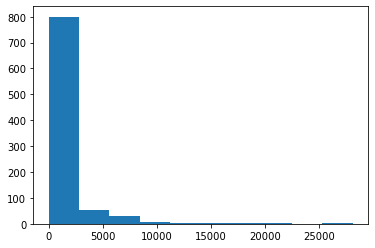

In [101]:
plt.hist(df["generation_gwh_2014"])

<AxesSubplot:ylabel='Density'>

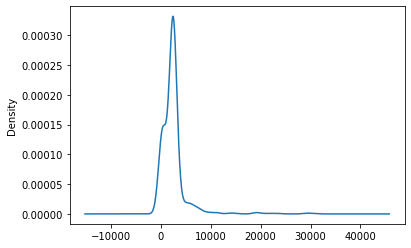

In [95]:
df["generation_gwh_2015"].plot(kind='density')

(array([800.,  63.,  24.,   7.,   3.,   0.,   5.,   2.,   0.,   3.]),
 array([    0. ,  3053.9,  6107.8,  9161.7, 12215.6, 15269.5, 18323.4,
        21377.3, 24431.2, 27485.1, 30539. ]),
 <BarContainer object of 10 artists>)

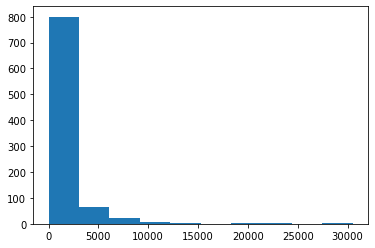

In [102]:
plt.hist(df["generation_gwh_2015"])

<AxesSubplot:ylabel='Density'>

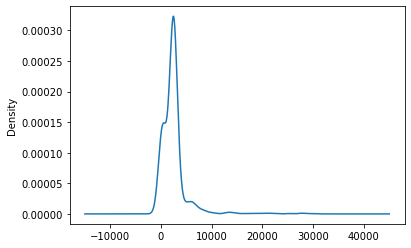

In [97]:
df["generation_gwh_2016"].plot(kind='density')

(array([787.,  68.,  33.,   3.,   6.,   1.,   3.,   2.,   1.,   3.]),
 array([    0. ,  3001.5,  6003. ,  9004.5, 12006. , 15007.5, 18009. ,
        21010.5, 24012. , 27013.5, 30015. ]),
 <BarContainer object of 10 artists>)

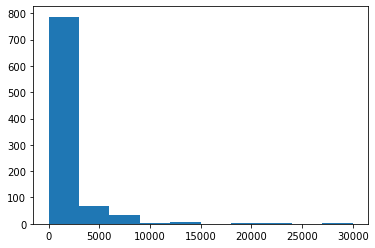

In [103]:
plt.hist(df["generation_gwh_2016"])

<AxesSubplot:ylabel='Density'>

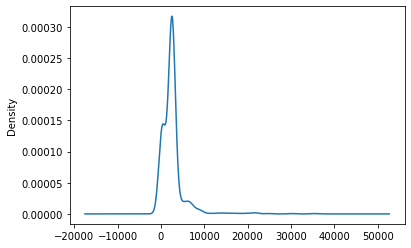

In [99]:
df["generation_gwh_2017"].plot(kind='density')

(array([804.,  67.,  20.,   4.,   3.,   3.,   3.,   1.,   1.,   1.]),
 array([    0. ,  3511.6,  7023.2, 10534.8, 14046.4, 17558. , 21069.6,
        24581.2, 28092.8, 31604.4, 35116. ]),
 <BarContainer object of 10 artists>)

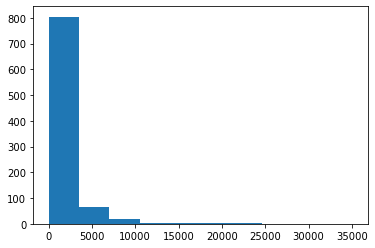

In [104]:
plt.hist(df["generation_gwh_2017"])

<AxesSubplot:ylabel='Density'>

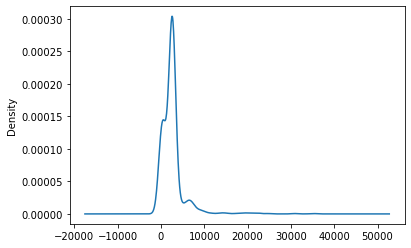

In [98]:
df["generation_gwh_2018"].plot(kind='density')

(array([806.,  58.,  26.,   4.,   3.,   4.,   3.,   1.,   1.,   1.]),
 array([    0. ,  3513.6,  7027.2, 10540.8, 14054.4, 17568. , 21081.6,
        24595.2, 28108.8, 31622.4, 35136. ]),
 <BarContainer object of 10 artists>)

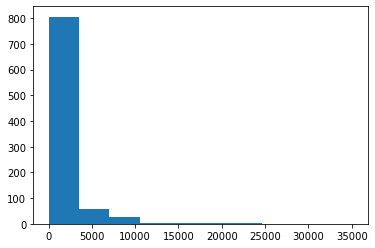

In [105]:
plt.hist(df["generation_gwh_2018"])

the electric generation in all these years in giga watt hours is between 0 and 2500

## conversion of categorical columns into numerical

In [111]:
from sklearn.preprocessing import LabelEncoder

In [112]:
le=LabelEncoder()

In [114]:
list=["primary_fuel","other_fuel1","owner","source"]
for i in list:
    df[i]=le.fit_transform(df[i])

In [128]:
 df["geolocation_source"]=le.fit_transform(df["geolocation_source"])

boxplot to check outliers

capacity_mw               AxesSubplot(0.125,0.749828;0.227941x0.130172)
latitude               AxesSubplot(0.398529,0.749828;0.227941x0.130172)
longitude              AxesSubplot(0.672059,0.749828;0.227941x0.130172)
primary_fuel              AxesSubplot(0.125,0.593621;0.227941x0.130172)
other_fuel1            AxesSubplot(0.398529,0.593621;0.227941x0.130172)
commissioning_year     AxesSubplot(0.672059,0.593621;0.227941x0.130172)
owner                     AxesSubplot(0.125,0.437414;0.227941x0.130172)
source                 AxesSubplot(0.398529,0.437414;0.227941x0.130172)
geolocation_source     AxesSubplot(0.672059,0.437414;0.227941x0.130172)
generation_gwh_2014       AxesSubplot(0.125,0.281207;0.227941x0.130172)
generation_gwh_2015    AxesSubplot(0.398529,0.281207;0.227941x0.130172)
generation_gwh_2016    AxesSubplot(0.672059,0.281207;0.227941x0.130172)
generation_gwh_2017          AxesSubplot(0.125,0.125;0.227941x0.130172)
generation_gwh_2018       AxesSubplot(0.398529,0.125;0.227941x0.

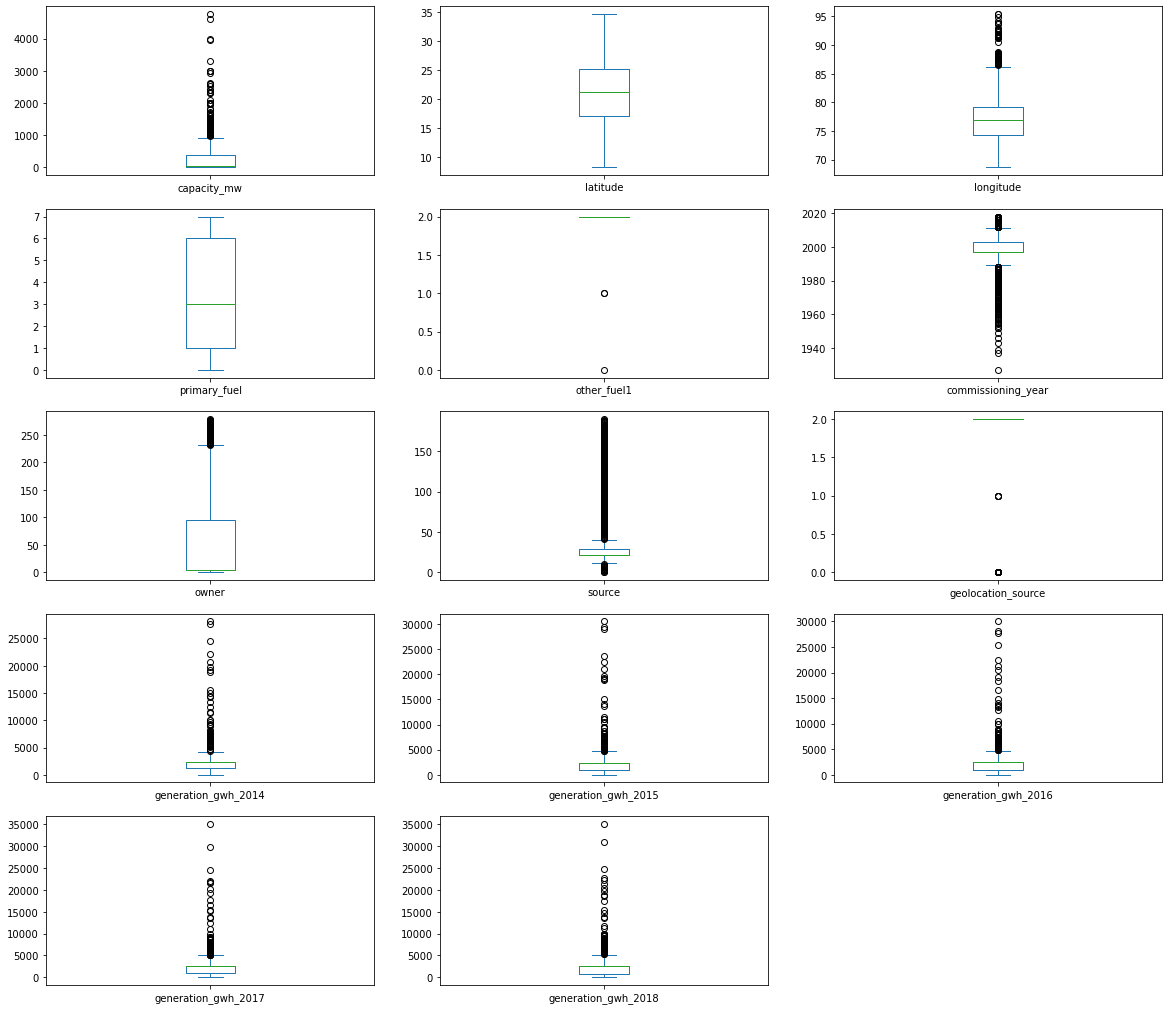

In [129]:
df.plot(kind='box',subplots=True,layout=(5,3),figsize=(20,18))

it can be seen that outliers are present

# descriptive statistics

In [130]:
df.describe()

,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,commissioning_year,owner,source,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
count,907.000000,907.000000,907.000000,907.000000,907.000000,907.000000,907.000000,907.000000,907.000000,907.000000,907.000000,907.000000,907.000000,907.000000
mean,326.223755,21.197918,77.464907,3.206174,1.995590,1997.091082,56.169791,43.847850,1.733186,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099
std,590.085456,6.079148,4.812291,2.280652,0.081259,13.016360,82.529116,44.642818,0.677151,2665.338608,2859.349132,2877.890004,2921.502193,3030.808041
min,0.000000,8.168900,68.644700,0.000000,0.000000,1927.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,16.725000,17.072000,74.388900,1.000000,2.000000,1997.091082,5.000000,22.000000,2.000000,1211.362750,916.000000,896.500214,882.594850,824.842340
50%,59.200000,21.281800,76.979200,3.000000,2.000000,1997.091082,5.000000,22.000000,2.000000,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099
75%,385.250000,25.176450,79.206100,6.000000,2.000000,2003.000000,95.500000,29.500000,2.000000,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099
max,4760.000000,34.649000,95.408000,7.000000,2.000000,2018.000000,279.000000,190.000000,2.000000,28127.000000,30539.000000,30015.000000,35116.000000,35136.000000


from the difference between the 75% quartile range and maximum value it can be seen that outliers are present

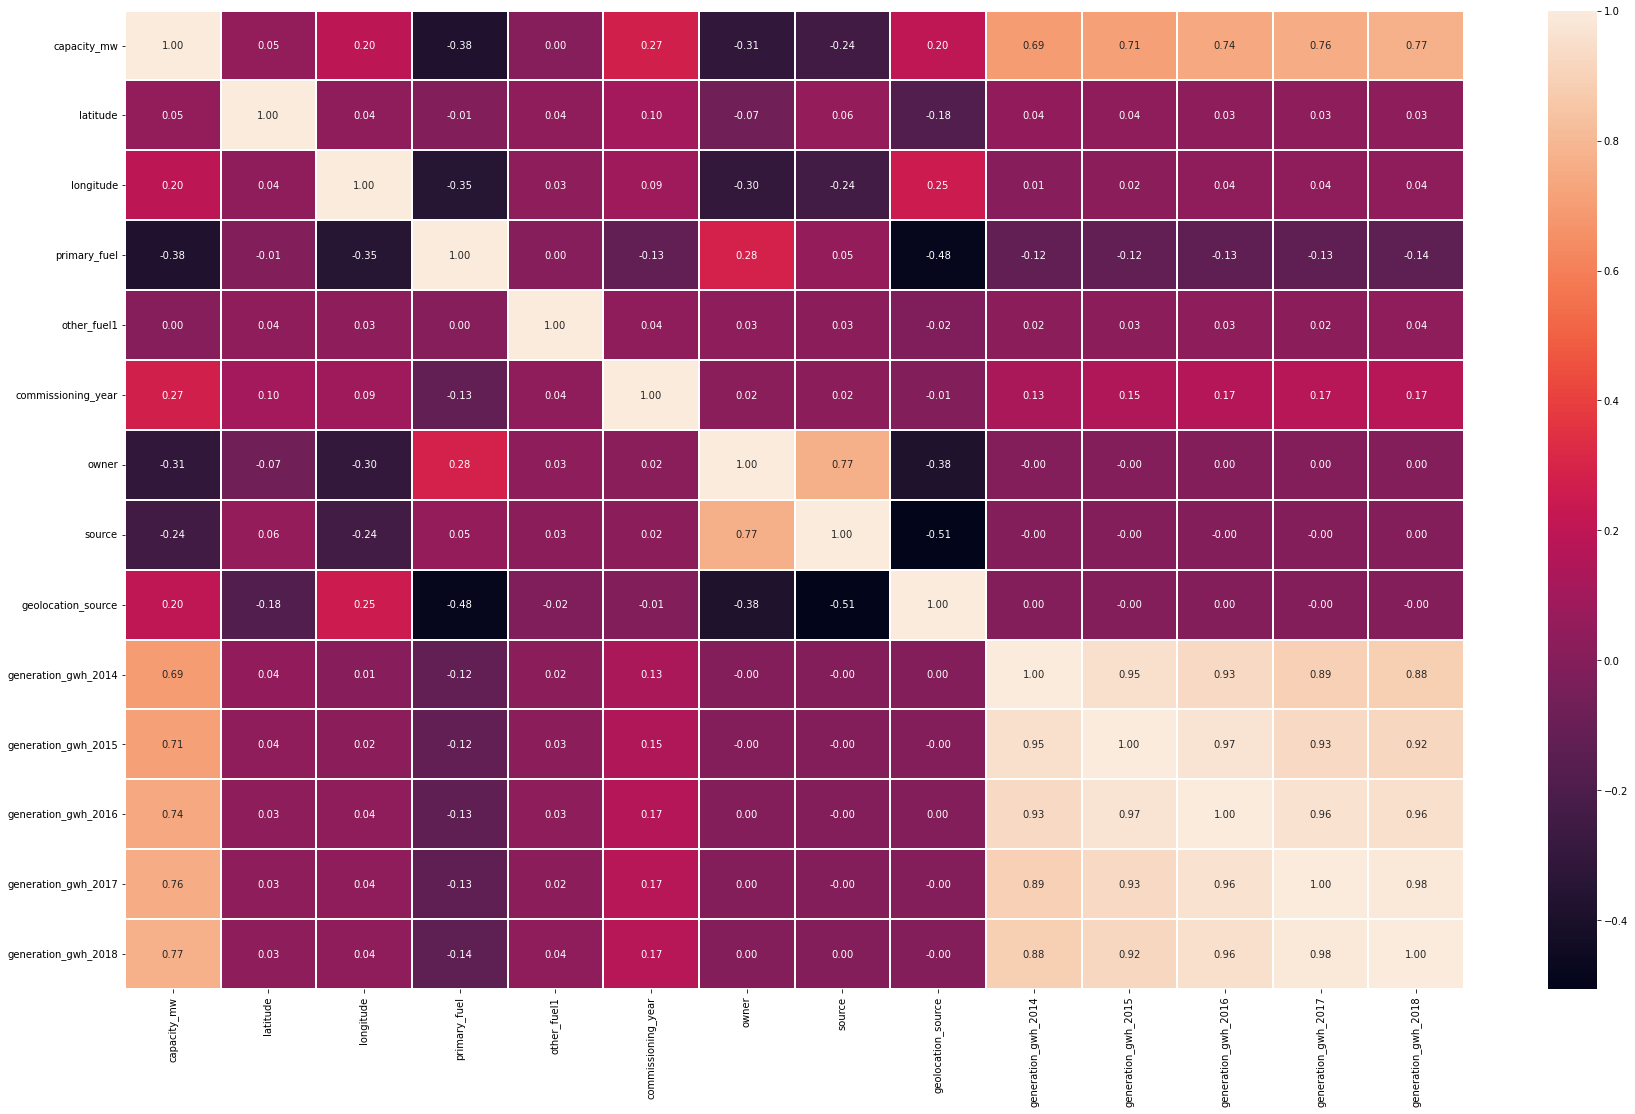

In [131]:
plt.figure(figsize=(30,18))
sns.heatmap(df.corr(),linewidth=0.2,annot=True,fmt="0.2f")
plt.show()

In [132]:
df.corr()["primary_fuel"].sort_values()

geolocation_source    -0.483217
capacity_mw           -0.380395
longitude             -0.347948
generation_gwh_2018   -0.136983
generation_gwh_2017   -0.132003
generation_gwh_2016   -0.131051
commissioning_year    -0.126650
generation_gwh_2015   -0.124828
generation_gwh_2014   -0.124769
latitude              -0.010204
other_fuel1            0.004912
source                 0.053613
owner                  0.284296
primary_fuel           1.000000
Name: primary_fuel, dtype: float64

from the heatmap it can be seen that there is strong presence of multicollinearity

### Checking VIF

In [120]:
from scipy import stats
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [133]:
def calc_vif(x1):
    vif=pd.DataFrame()
    vif["Variables"]=x1.columns
    vif["VIF factor"]=[variance_inflation_factor(x1.values,i) for i in range(x1.shape[1])]
    return (vif)

In [134]:
x=df.drop(["primary_fuel"],axis=1)
y=df["primary_fuel"]

In [135]:
calc_vif(x)

,Variables,VIF factor
0,capacity_mw,4.514740
1,latitude,14.279585
2,longitude,302.469020
3,other_fuel1,605.764584
4,commissioning_year,876.848301
5,owner,4.259536
6,source,5.597445
7,geolocation_source,11.095279
8,generation_gwh_2014,20.482429
9,generation_gwh_2015,45.318450


from the 5 columns generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018, columnn has generation_gwh_2017 has the highest vif, so we can drop it 

In [140]:
x.drop(["generation_gwh_2017"],axis=1,inplace=True)

In [142]:
x.drop(["generation_gwh_2016","generation_gwh_2018"],axis=1,inplace=True)

In [145]:
x.drop(["generation_gwh_2015"],axis=1,inplace=True)

In [147]:
dfn=df.drop(['generation_gwh_2015','generation_gwh_2016','generation_gwh_2017','generation_gwh_2018'],axis=1)

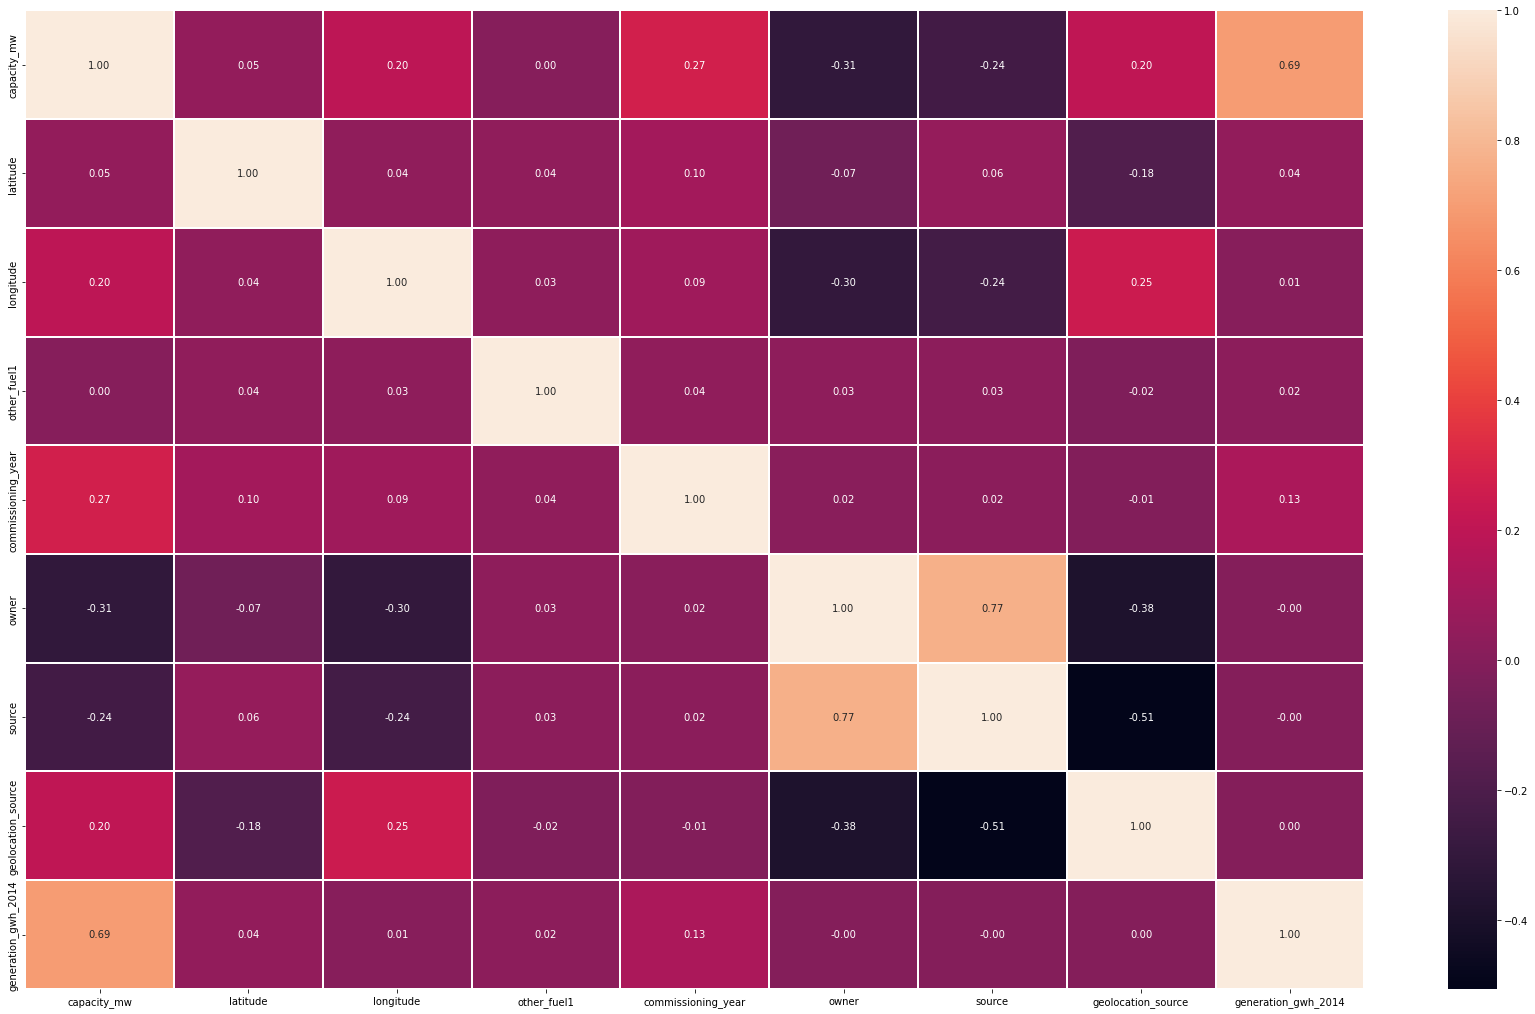

In [146]:
plt.figure(figsize=(30,18))
sns.heatmap(x.corr(),linewidth=0.2,annot=True,fmt="0.2f")
plt.show()

## removal of outliers

In [148]:
from scipy.stats import zscore
z=np.abs(zscore(dfn))

In [149]:
np.where(z>3)

(array([ 15,  71,  80, 143, 143, 147, 158, 179, 183, 191, 209, 209, 222,
        244, 299, 308, 308, 321, 323, 333, 340, 342, 345, 360, 363, 364,
        364, 371, 375, 416, 427, 444, 454, 478, 482, 484, 493, 493, 494,
        494, 499, 519, 538, 541, 546, 573, 577, 583, 592, 601, 621, 638,
        648, 648, 657, 657, 661, 669, 689, 695, 695, 706, 709, 721, 724,
        726, 726, 728, 767, 786, 786, 788, 807, 808, 808, 811, 813, 817,
        818, 832, 847, 848, 870, 871, 879, 880, 880, 895, 900], dtype=int64),
 array([0, 7, 7, 0, 9, 0, 9, 2, 2, 7, 0, 9, 5, 2, 7, 0, 9, 7, 2, 2, 2, 5,
        7, 2, 0, 0, 9, 5, 0, 2, 2, 5, 5, 5, 0, 5, 0, 9, 0, 9, 2, 2, 5, 5,
        2, 5, 2, 5, 5, 5, 5, 2, 0, 9, 0, 9, 7, 7, 7, 0, 9, 5, 5, 9, 9, 0,
        9, 5, 0, 0, 9, 0, 5, 0, 9, 4, 4, 4, 2, 7, 2, 5, 7, 7, 7, 0, 9, 7,
        7], dtype=int64))

In [155]:
dfnew=dfn[(z<3).all(axis=1)]

In [151]:
dfnew.shape

(831, 10)

% loss in data=(907-831)/907  *   100   = 8.3%

## skewness of data

In [152]:
dfnew.skew().sort_values()

geolocation_source    -2.098153
commissioning_year    -0.836352
latitude              -0.116001
other_fuel1            0.000000
primary_fuel           0.414888
longitude              0.907429
owner                  1.316648
generation_gwh_2014    1.524498
source                 1.778820
capacity_mw            1.951101
dtype: float64

skewnes needs to be adjusted 

In [163]:
from sklearn.preprocessing import power_transform


In [164]:
x=dfnew.drop(["primary_fuel"],axis=1)

In [177]:
y=dfnew["primary_fuel"]

In [166]:
x=power_transform(x,method='yeo-johnson')

In [167]:
dfnew.skew().sort_values()

geolocation_source    -2.098153
commissioning_year    -0.836352
latitude              -0.116001
other_fuel1            0.000000
primary_fuel           0.414888
longitude              0.907429
owner                  1.316648
generation_gwh_2014    1.524498
source                 1.778820
capacity_mw            1.951101
dtype: float64

# scaling the data using standard scaler

In [176]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

In [178]:
dfx=sc.fit_transform(x)

In [179]:
dfx.mean()

4.682940183215183e-09

# splitting of train and test data

## using classification model to predict the primary_fuel

In [183]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
from sklearn.model_selection import cross_val_score

In [191]:
def model_selection(instance):
    maxacc=0
    rs=0
    for i in range(0,100):
        x_train,x_test,y_train,y_test=train_test_split(dfx,y,random_state=i,test_size=0.30)
        instance.fit(x_train,y_train)
        pred_train=instance.predict(x_train)
        pred_test=instance.predict(x_test)
        if((accuracy_score(y_test,pred_test))>maxacc):
            maxacc=accuracy_score(y_test,pred_test)
            rs=i
        print(f"at random state {i},  accuracy score is {accuracy_score(y_test,pred_test)}")
        print(f"at random state {i}, confusion matrix is {confusion_matrix(y_test,pred_test)}")
        print(f"at random state {i}, classification report is {classification_report(y_test,pred_test)}")
        print("\n")
    print("Max accuracy at random state",rs, "=",maxacc)
   

# KNeighbors classifier

In [192]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=5)
model_selection(knn)

at random state 0,  accuracy score is 0.804
at random state 0, confusion matrix is [[10  2  0  0  0  0  0  1]
 [ 3 56  3  3  0  0  0  3]
 [ 0  0 10  7  0  0  0  0]
 [ 0  9  3 57  0  0  0  3]
 [ 0  1  1  1  0  0  0  0]
 [ 0  0  3  2  0  0  0  1]
 [ 0  0  0  0  0  0 34  0]
 [ 0  0  0  3  0  0  0 34]]
at random state 0, classification report is               precision    recall  f1-score   support

           0       0.77      0.77      0.77        13
           1       0.82      0.82      0.82        68
           2       0.50      0.59      0.54        17
           3       0.78      0.79      0.79        72
           4       0.00      0.00      0.00         3
           5       0.00      0.00      0.00         6
           6       1.00      1.00      1.00        34
           7       0.81      0.92      0.86        37

    accuracy                           0.80       250
   macro avg       0.59      0.61      0.60       250
weighted avg       0.78      0.80      0.79       250



at 

at random state 10, classification report is               precision    recall  f1-score   support

           0       0.67      0.92      0.77        13
           1       0.76      0.81      0.79        68
           2       0.60      0.60      0.60        15
           3       0.89      0.78      0.83        76
           4       0.00      0.00      0.00         3
           5       0.50      0.33      0.40         3
           6       1.00      1.00      1.00        35
           7       0.83      0.95      0.89        37

    accuracy                           0.82       250
   macro avg       0.66      0.67      0.66       250
weighted avg       0.82      0.82      0.82       250



at random state 11,  accuracy score is 0.82
at random state 11, confusion matrix is [[14  5  0  0  0  1  0  0]
 [ 1 54  1  3  0  0  0  1]
 [ 1  3 10  4  0  2  0  0]
 [ 0  4  2 48  0  1  0  3]
 [ 0  3  1  0  0  0  0  0]
 [ 0  0  1  3  0  1  0  1]
 [ 0  0  0  0  0  0 45  0]
 [ 1  0  0  3  0  0  0 33]]
a

at random state 19, classification report is               precision    recall  f1-score   support

           0       0.73      0.69      0.71        16
           1       0.69      0.84      0.76        76
           2       0.50      0.22      0.31        18
           3       0.82      0.83      0.82        70
           4       0.00      0.00      0.00         3
           5       0.50      0.20      0.29         5
           6       1.00      0.93      0.97        30
           7       0.91      0.94      0.92        32

    accuracy                           0.78       250
   macro avg       0.64      0.58      0.60       250
weighted avg       0.77      0.78      0.77       250



at random state 20,  accuracy score is 0.792
at random state 20, confusion matrix is [[13  1  0  0  0  0  0  1]
 [ 5 60  3  7  0  0  0  4]
 [ 0  4 11  5  0  1  0  1]
 [ 0  5  1 57  0  0  0  1]
 [ 0  2  0  1  0  0  0  0]
 [ 0  1  1  3  0  1  0  1]
 [ 0  0  0  0  0  0 29  0]
 [ 0  0  0  4  0  0  0 27]]


at random state 28,  accuracy score is 0.8
at random state 28, confusion matrix is [[ 9  1  0  0  0  0  0  1]
 [ 3 69  1  7  0  0  0  1]
 [ 0  6  7  4  0  0  0  0]
 [ 0  8  4 55  0  0  0  1]
 [ 0  2  0  0  0  0  0  0]
 [ 0  1  2  2  0  1  0  1]
 [ 0  0  0  0  0  0 29  0]
 [ 0  0  0  5  0  0  0 30]]
at random state 28, classification report is               precision    recall  f1-score   support

           0       0.75      0.82      0.78        11
           1       0.79      0.85      0.82        81
           2       0.50      0.41      0.45        17
           3       0.75      0.81      0.78        68
           4       0.00      0.00      0.00         2
           5       1.00      0.14      0.25         7
           6       1.00      1.00      1.00        29
           7       0.88      0.86      0.87        35

    accuracy                           0.80       250
   macro avg       0.71      0.61      0.62       250
weighted avg       0.80      0.80      0.79       250



at

at random state 38, confusion matrix is [[ 9  3  0  0  0  0  0  1]
 [ 6 56  3  4  0  0  0  0]
 [ 0  3 10  7  0  0  0  0]
 [ 0  5  2 51  0  0  0  4]
 [ 0  2  0  0  0  0  0  0]
 [ 1  0  6  2  0  0  0  0]
 [ 0  1  0  0  0  0 32  0]
 [ 0  1  0  2  0  0  0 39]]
at random state 38, classification report is               precision    recall  f1-score   support

           0       0.56      0.69      0.62        13
           1       0.79      0.81      0.80        69
           2       0.48      0.50      0.49        20
           3       0.77      0.82      0.80        62
           4       0.00      0.00      0.00         2
           5       0.00      0.00      0.00         9
           6       1.00      0.97      0.98        33
           7       0.89      0.93      0.91        42

    accuracy                           0.79       250
   macro avg       0.56      0.59      0.57       250
weighted avg       0.76      0.79      0.77       250



at random state 39,  accuracy score is 0.852


at random state 48,  accuracy score is 0.816
at random state 48, confusion matrix is [[15  2  0  0  0  0  0  0]
 [ 2 54  2  3  0  0  0  0]
 [ 0  8  3  1  0  1  0  1]
 [ 0 12  1 53  0  2  0  1]
 [ 0  2  1  0  0  0  0  0]
 [ 0  0  2  2  0  1  0  0]
 [ 0  1  0  0  0  0 40  0]
 [ 0  0  0  2  0  0  0 38]]
at random state 48, classification report is               precision    recall  f1-score   support

           0       0.88      0.88      0.88        17
           1       0.68      0.89      0.77        61
           2       0.33      0.21      0.26        14
           3       0.87      0.77      0.82        69
           4       0.00      0.00      0.00         3
           5       0.25      0.20      0.22         5
           6       1.00      0.98      0.99        41
           7       0.95      0.95      0.95        40

    accuracy                           0.82       250
   macro avg       0.62      0.61      0.61       250
weighted avg       0.81      0.82      0.81       250





at random state 57,  accuracy score is 0.824
at random state 57, confusion matrix is [[13  1  0  0  0  0  0  0]
 [ 6 53  0  3  0  0  0  3]
 [ 1  6 12  1  0  0  0  0]
 [ 0  6  1 56  0  0  0  1]
 [ 0  1  0  0  0  0  0  0]
 [ 1  1  2  1  0  1  0  2]
 [ 0  3  0  0  0  0 30  0]
 [ 0  0  0  4  0  0  0 41]]
at random state 57, classification report is               precision    recall  f1-score   support

           0       0.62      0.93      0.74        14
           1       0.75      0.82      0.78        65
           2       0.80      0.60      0.69        20
           3       0.86      0.88      0.87        64
           4       0.00      0.00      0.00         1
           5       1.00      0.12      0.22         8
           6       1.00      0.91      0.95        33
           7       0.87      0.91      0.89        45

    accuracy                           0.82       250
   macro avg       0.74      0.65      0.64       250
weighted avg       0.83      0.82      0.81       250





at random state 67, classification report is               precision    recall  f1-score   support

           0       0.64      0.89      0.74        18
           1       0.73      0.75      0.74        61
           2       0.41      0.37      0.39        19
           3       0.84      0.87      0.86        71
           4       0.00      0.00      0.00         4
           5       0.25      0.14      0.18         7
           6       1.00      1.00      1.00        36
           7       1.00      0.91      0.95        34

    accuracy                           0.80       250
   macro avg       0.61      0.62      0.61       250
weighted avg       0.78      0.80      0.79       250



at random state 68,  accuracy score is 0.828
at random state 68, confusion matrix is [[17  2  0  0  0  0  0  0]
 [ 5 57  1  3  0  0  0  3]
 [ 0  4 10  4  0  0  0  0]
 [ 0  5  0 50  0  0  0  1]
 [ 0  2  0  1  0  0  0  0]
 [ 0  0  5  3  0  0  0  1]
 [ 0  1  0  0  0  0 42  0]
 [ 0  0  0  2  0  0  0 31]]


at random state 80,  accuracy score is 0.816
at random state 80, confusion matrix is [[13  2  0  0  0  0  0  1]
 [ 3 61  0  2  0  0  0  4]
 [ 0  7  8  3  0  0  0  0]
 [ 0 11  0 57  0  3  0  1]
 [ 0  4  0  0  0  0  0  0]
 [ 0  0  1  0  0  0  0  0]
 [ 0  0  0  0  0  0 29  0]
 [ 0  0  0  4  0  0  0 36]]
at random state 80, classification report is               precision    recall  f1-score   support

           0       0.81      0.81      0.81        16
           1       0.72      0.87      0.79        70
           2       0.89      0.44      0.59        18
           3       0.86      0.79      0.83        72
           4       0.00      0.00      0.00         4
           5       0.00      0.00      0.00         1
           6       1.00      1.00      1.00        29
           7       0.86      0.90      0.88        40

    accuracy                           0.82       250
   macro avg       0.64      0.60      0.61       250
weighted avg       0.82      0.82      0.81       250





at random state 89, confusion matrix is [[ 9  4  0  0  0  0  0  0]
 [ 3 53  2  6  0  0  0  1]
 [ 0  9  9  7  0  0  0  0]
 [ 0  8  2 60  0  0  0  4]
 [ 0  3  0  1  0  0  0  0]
 [ 0  0  2  3  0  0  0  0]
 [ 1  1  0  0  0  0 34  0]
 [ 0  1  0  1  0  0  0 26]]
at random state 89, classification report is               precision    recall  f1-score   support

           0       0.69      0.69      0.69        13
           1       0.67      0.82      0.74        65
           2       0.60      0.36      0.45        25
           3       0.77      0.81      0.79        74
           4       0.00      0.00      0.00         4
           5       0.00      0.00      0.00         5
           6       1.00      0.94      0.97        36
           7       0.84      0.93      0.88        28

    accuracy                           0.76       250
   macro avg       0.57      0.57      0.57       250
weighted avg       0.74      0.76      0.74       250



at random state 90,  accuracy score is 0.784


CV score

In [184]:
score=cross_val_score(knn,dfx,y,cv=5)
print(score)
print(score.mean())
print(score.std())

[0.80239521 0.86144578 0.81325301 0.78915663 0.8253012 ]
0.8183103672173726
0.024650945612358706


# Logistic Regression

In [186]:
from sklearn.linear_model import LogisticRegression
lg=LogisticRegression()
model_selection(lg)

at random state 0,  accuracy score is 0.7108433734939759
at random state 0, confusion matrix is [[ 5  1  0  0  0  0  0  7]
 [ 4 47  3  8  0  0  0  6]
 [ 0  1  6 10  0  0  0  0]
 [ 0 11  5 51  0  0  0  5]
 [ 0  2  0  1  0  0  0  0]
 [ 2  0  0  3  0  0  0  1]
 [ 0  1  0  0  0  0 33  0]
 [ 0  4  0  8  0  0  0 25]]
at random state 0, classification report is               precision    recall  f1-score   support

           0       0.45      0.38      0.42        13
           1       0.70      0.69      0.70        68
           2       0.43      0.35      0.39        17
           3       0.63      0.71      0.67        72
           4       0.00      0.00      0.00         3
           5       0.00      0.00      0.00         6
           6       1.00      0.97      0.99        34
           7       0.57      0.68      0.62        37

    accuracy                           0.67       250
   macro avg       0.47      0.47      0.47       250
weighted avg       0.65      0.67      0.65    

at random state 14, confusion matrix is [[ 9  1  0  0  0  0  0  1]
 [ 4 57  5 11  0  0  0  6]
 [ 0  6  3  6  0  0  0  1]
 [ 0  3  1 51  0  0  0  4]
 [ 0  2  0  1  0  0  0  0]
 [ 0  1  0  4  0  0  0  0]
 [ 0  1  0  1  0  0 35  0]
 [ 0  1  0  7  0  0  0 28]]
at random state 14, classification report is               precision    recall  f1-score   support

           0       0.69      0.82      0.75        11
           1       0.79      0.69      0.74        83
           2       0.33      0.19      0.24        16
           3       0.63      0.86      0.73        59
           4       0.00      0.00      0.00         3
           5       0.00      0.00      0.00         5
           6       1.00      0.95      0.97        37
           7       0.70      0.78      0.74        36

    accuracy                           0.73       250
   macro avg       0.52      0.54      0.52       250
weighted avg       0.71      0.73      0.71       250



at random state 15,  accuracy score is 0.7211

at random state 28, confusion matrix is [[ 7  0  0  0  0  0  0  4]
 [ 4 62  1 11  0  0  0  3]
 [ 2  6  3  6  0  0  0  0]
 [ 0 10  0 57  0  0  0  1]
 [ 0  1  0  1  0  0  0  0]
 [ 2  1  0  3  0  0  0  1]
 [ 0  0  0  0  0  0 29  0]
 [ 0  3  0 12  0  0  0 20]]
at random state 28, classification report is               precision    recall  f1-score   support

           0       0.47      0.64      0.54        11
           1       0.75      0.77      0.76        81
           2       0.75      0.18      0.29        17
           3       0.63      0.84      0.72        68
           4       0.00      0.00      0.00         2
           5       0.00      0.00      0.00         7
           6       1.00      1.00      1.00        29
           7       0.69      0.57      0.62        35

    accuracy                           0.71       250
   macro avg       0.54      0.50      0.49       250
weighted avg       0.70      0.71      0.69       250



at random state 29,  accuracy score is 0.6970

at random state 41, confusion matrix is [[11  3  0  0  0  0  0  3]
 [ 3 46  3  8  0  0  0  5]
 [ 0  7  5  8  0  0  0  1]
 [ 0  7  4 37  0  0  0  1]
 [ 0  2  0  4  0  0  0  0]
 [ 1  1  0  3  0  0  0  1]
 [ 0  0  0  0  0  0 39  1]
 [ 0  5  0  9  0  0  0 32]]
at random state 41, classification report is               precision    recall  f1-score   support

           0       0.73      0.65      0.69        17
           1       0.65      0.71      0.68        65
           2       0.42      0.24      0.30        21
           3       0.54      0.76      0.63        49
           4       0.00      0.00      0.00         6
           5       0.00      0.00      0.00         6
           6       1.00      0.97      0.99        40
           7       0.73      0.70      0.71        46

    accuracy                           0.68       250
   macro avg       0.51      0.50      0.50       250
weighted avg       0.65      0.68      0.66       250



at random state 42,  accuracy score is 0.6867

at random state 54, classification report is               precision    recall  f1-score   support

           0       0.60      0.50      0.55        12
           1       0.65      0.80      0.72        69
           2       0.50      0.10      0.17        20
           3       0.63      0.75      0.68        67
           4       0.00      0.00      0.00         1
           5       0.00      0.00      0.00         4
           6       1.00      0.93      0.97        45
           7       0.71      0.69      0.70        32

    accuracy                           0.71       250
   macro avg       0.51      0.47      0.47       250
weighted avg       0.69      0.71      0.68       250



at random state 55,  accuracy score is 0.7160068846815835
at random state 55, confusion matrix is [[10  2  0  0  0  0  0  3]
 [ 5 47  0  9  0  0  0  5]
 [ 3  8  5 10  0  0  0  1]
 [ 0  5  1 51  0  0  0  1]
 [ 0  2  0  0  0  0  0  0]
 [ 3  0  0  1  0  0  0  1]
 [ 0  3  0  1  0  0 39  0]
 [ 0  2  0  9  

at random state 69, classification report is               precision    recall  f1-score   support

           0       0.44      0.62      0.52        13
           1       0.74      0.67      0.70        67
           2       0.39      0.33      0.36        21
           3       0.68      0.73      0.70        71
           4       0.00      0.00      0.00         2
           5       0.00      0.00      0.00         4
           6       1.00      0.97      0.98        32
           7       0.56      0.60      0.58        40

    accuracy                           0.67       250
   macro avg       0.48      0.49      0.48       250
weighted avg       0.66      0.67      0.66       250



at random state 70,  accuracy score is 0.6867469879518072
at random state 70, confusion matrix is [[12  4  0  0  0  0  0  3]
 [ 3 49  2  4  0  0  0  0]
 [ 2  4  4  7  0  0  0  0]
 [ 0 14  2 53  0  0  0  3]
 [ 0  1  0  0  0  0  0  0]
 [ 0  2  0  3  0  0  0  0]
 [ 0  0  0  0  0  0 38  0]
 [ 0  3  0 10  

at random state 83,  accuracy score is 0.7160068846815835
at random state 83, confusion matrix is [[ 8  4  0  0  0  0  0  1]
 [ 4 48  7  9  0  0  0  3]
 [ 0  2  7  9  0  0  0  0]
 [ 0 11  3 49  0  0  0  0]
 [ 0  2  0  2  0  0  0  0]
 [ 0  0  0  3  0  0  0  2]
 [ 0  2  0  0  0  0 34  0]
 [ 0  4  0 11  0  0  0 25]]
at random state 83, classification report is               precision    recall  f1-score   support

           0       0.67      0.62      0.64        13
           1       0.66      0.68      0.67        71
           2       0.41      0.39      0.40        18
           3       0.59      0.78      0.67        63
           4       0.00      0.00      0.00         4
           5       0.00      0.00      0.00         5
           6       1.00      0.94      0.97        36
           7       0.81      0.62      0.70        40

    accuracy                           0.68       250
   macro avg       0.52      0.50      0.51       250
weighted avg       0.67      0.68      0.67 

at random state 96,  accuracy score is 0.7022375215146299
at random state 96, confusion matrix is [[12  1  0  0  0  0  0  4]
 [ 3 50  1  9  0  0  0  5]
 [ 2  6  5  5  0  0  0  0]
 [ 0 11  1 53  0  0  0  0]
 [ 0  0  0  2  0  0  0  0]
 [ 0  1  0  3  0  0  0  1]
 [ 0  1  0  1  0  0 34  0]
 [ 0  2  0  9  0  0  0 28]]
at random state 96, classification report is               precision    recall  f1-score   support

           0       0.71      0.71      0.71        17
           1       0.69      0.74      0.71        68
           2       0.71      0.28      0.40        18
           3       0.65      0.82      0.72        65
           4       0.00      0.00      0.00         2
           5       0.00      0.00      0.00         5
           6       1.00      0.94      0.97        36
           7       0.74      0.72      0.73        39

    accuracy                           0.73       250
   macro avg       0.56      0.52      0.53       250
weighted avg       0.72      0.73      0.71 

CV score

In [187]:
score=cross_val_score(lg,dfx,y,cv=5)
print(score)
print(score.mean())
print(score.std())

[0.68263473 0.72891566 0.68674699 0.69879518 0.69879518]
0.699177548517423
0.01620389771075986


# Decision Tree Classifier

In [188]:
from sklearn.tree import DecisionTreeClassifier
dtc=DecisionTreeClassifier()
model_selection(dtc)

at random state 0,  accuracy score is 1.0
at random state 0, confusion matrix is [[ 6  7  0  0  0  0  0  0]
 [ 1 51  7  6  2  0  0  1]
 [ 0  1 11  4  0  1  0  0]
 [ 0  7  2 61  0  2  0  0]
 [ 0  1  1  0  1  0  0  0]
 [ 0  1  1  2  0  2  0  0]
 [ 0  0  0  0  0  0 34  0]
 [ 0  0  0  0  0  0  0 37]]
at random state 0, classification report is               precision    recall  f1-score   support

           0       0.86      0.46      0.60        13
           1       0.75      0.75      0.75        68
           2       0.50      0.65      0.56        17
           3       0.84      0.85      0.84        72
           4       0.33      0.33      0.33         3
           5       0.40      0.33      0.36         6
           6       1.00      1.00      1.00        34
           7       0.97      1.00      0.99        37

    accuracy                           0.81       250
   macro avg       0.71      0.67      0.68       250
weighted avg       0.82      0.81      0.81       250



at ra

at random state 19,  accuracy score is 1.0
at random state 19, confusion matrix is [[ 7  8  1  0  0  0  0  0]
 [ 2 51 10  8  4  0  0  1]
 [ 0  8  5  5  0  0  0  0]
 [ 0 11  7 49  1  2  0  0]
 [ 0  2  0  0  1  0  0  0]
 [ 0  1  2  0  0  2  0  0]
 [ 0  0  1  0  0  0 29  0]
 [ 0  0  0  0  0  0  0 32]]
at random state 19, classification report is               precision    recall  f1-score   support

           0       0.78      0.44      0.56        16
           1       0.63      0.67      0.65        76
           2       0.19      0.28      0.23        18
           3       0.79      0.70      0.74        70
           4       0.17      0.33      0.22         3
           5       0.50      0.40      0.44         5
           6       1.00      0.97      0.98        30
           7       0.97      1.00      0.98        32

    accuracy                           0.70       250
   macro avg       0.63      0.60      0.60       250
weighted avg       0.73      0.70      0.71       250



at

at random state 33, confusion matrix is [[10  0  1  0  0  0  0  0]
 [ 9 54  7  4  1  2  0  1]
 [ 0  2  8  2  0  2  0  0]
 [ 0  1  3 56  0  2  0  0]
 [ 0  1  1  0  0  0  0  0]
 [ 1  2  0  0  0  3  0  0]
 [ 0  0  0  0  0  0 31  0]
 [ 0  0  0  0  0  0  0 46]]
at random state 33, classification report is               precision    recall  f1-score   support

           0       0.50      0.91      0.65        11
           1       0.90      0.69      0.78        78
           2       0.40      0.57      0.47        14
           3       0.90      0.90      0.90        62
           4       0.00      0.00      0.00         2
           5       0.33      0.50      0.40         6
           6       1.00      1.00      1.00        31
           7       0.98      1.00      0.99        46

    accuracy                           0.83       250
   macro avg       0.63      0.70      0.65       250
weighted avg       0.86      0.83      0.84       250



at random state 34,  accuracy score is 1.0
at

at random state 52, classification report is               precision    recall  f1-score   support

           0       1.00      0.68      0.81        19
           1       0.78      0.82      0.80        71
           2       0.33      0.50      0.40        14
           3       0.84      0.70      0.76        60
           4       0.33      0.33      0.33         3
           5       0.29      1.00      0.44         2
           6       1.00      1.00      1.00        39
           7       0.98      1.00      0.99        42

    accuracy                           0.82       250
   macro avg       0.69      0.75      0.69       250
weighted avg       0.85      0.82      0.82       250



at random state 53,  accuracy score is 1.0
at random state 53, confusion matrix is [[ 9  3  0  0  0  0  0  0]
 [ 5 39  2 14  2  1  0  0]
 [ 0  6  7  8  2  0  0  0]
 [ 0  3  2 62  0  1  0  0]
 [ 0  0  0  0  0  0  0  0]
 [ 0  0  4  2  0  4  0  0]
 [ 0  0  0  0  0  0 33  0]
 [ 0  0  0  0  0  0  0 41]]
at

at random state 70, classification report is               precision    recall  f1-score   support

           0       0.91      0.53      0.67        19
           1       0.62      0.78      0.69        58
           2       0.40      0.35      0.38        17
           3       0.87      0.76      0.81        72
           4       0.00      0.00      0.00         1
           5       0.50      0.60      0.55         5
           6       1.00      1.00      1.00        38
           7       1.00      1.00      1.00        40

    accuracy                           0.79       250
   macro avg       0.66      0.63      0.64       250
weighted avg       0.81      0.79      0.79       250



at random state 71,  accuracy score is 1.0
at random state 71, confusion matrix is [[10  6  0  0  0  0  0  0]
 [ 2 55  5  7  2  1  0  1]
 [ 0  2  9  4  0  0  0  0]
 [ 0  3  9 54  0  0  0  0]
 [ 0  4  0  0  2  0  0  0]
 [ 0  0  1  1  0  2  0  0]
 [ 0  0  0  0  0  0 41  0]
 [ 0  0  0  0  0  0  0 29]]
at

at random state 89,  accuracy score is 1.0
at random state 89, confusion matrix is [[10  3  0  0  0  0  0  0]
 [ 0 50  5  8  0  2  0  0]
 [ 0  8 13  3  0  1  0  0]
 [ 0 11  5 54  3  1  0  0]
 [ 0  2  0  1  1  0  0  0]
 [ 0  2  1  0  0  2  0  0]
 [ 0  0  0  0  0  0 36  0]
 [ 0  0  0  0  0  0  0 28]]
at random state 89, classification report is               precision    recall  f1-score   support

           0       1.00      0.77      0.87        13
           1       0.66      0.77      0.71        65
           2       0.54      0.52      0.53        25
           3       0.82      0.73      0.77        74
           4       0.25      0.25      0.25         4
           5       0.33      0.40      0.36         5
           6       1.00      1.00      1.00        36
           7       1.00      1.00      1.00        28

    accuracy                           0.78       250
   macro avg       0.70      0.68      0.69       250
weighted avg       0.79      0.78      0.78       250



at

CV Score

In [189]:
score=cross_val_score(dtc,dfx,y,cv=5)
print(score)
print(score.mean())
print(score.std())

[0.80838323 0.78915663 0.79518072 0.76506024 0.79518072]
0.7905923093571893
0.014230753755462296


# Random Forest Classifier

In [193]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
model_selection(rf)

at random state 0,  accuracy score is 0.88
at random state 0, confusion matrix is [[11  2  0  0  0  0  0  0]
 [ 3 57  4  2  0  1  0  1]
 [ 0  0 13  4  0  0  0  0]
 [ 0  5  1 66  0  0  0  0]
 [ 0  1  0  2  0  0  0  0]
 [ 0  1  0  3  0  2  0  0]
 [ 0  0  0  0  0  0 34  0]
 [ 0  0  0  0  0  0  0 37]]
at random state 0, classification report is               precision    recall  f1-score   support

           0       0.79      0.85      0.81        13
           1       0.86      0.84      0.85        68
           2       0.72      0.76      0.74        17
           3       0.86      0.92      0.89        72
           4       0.00      0.00      0.00         3
           5       0.67      0.33      0.44         6
           6       1.00      1.00      1.00        34
           7       0.97      1.00      0.99        37

    accuracy                           0.88       250
   macro avg       0.73      0.71      0.72       250
weighted avg       0.87      0.88      0.87       250



at r

at random state 9,  accuracy score is 0.852
at random state 9, confusion matrix is [[ 5  2  0  0  0  0  0  0]
 [ 3 55  2  8  0  0  0  0]
 [ 0  5 10  4  0  0  0  0]
 [ 0  2  2 63  0  0  0  0]
 [ 0  2  0  0  0  0  0  0]
 [ 0  2  2  3  0  3  0  0]
 [ 0  0  0  0  0  0 42  0]
 [ 0  0  0  0  0  0  0 35]]
at random state 9, classification report is               precision    recall  f1-score   support

           0       0.62      0.71      0.67         7
           1       0.81      0.81      0.81        68
           2       0.62      0.53      0.57        19
           3       0.81      0.94      0.87        67
           4       0.00      0.00      0.00         2
           5       1.00      0.30      0.46        10
           6       1.00      1.00      1.00        42
           7       1.00      1.00      1.00        35

    accuracy                           0.85       250
   macro avg       0.73      0.66      0.67       250
weighted avg       0.85      0.85      0.84       250



at 

at random state 17, classification report is               precision    recall  f1-score   support

           0       0.60      0.50      0.55        12
           1       0.78      0.89      0.83        70
           2       0.79      0.62      0.70        24
           3       0.87      0.88      0.87        74
           4       0.00      0.00      0.00         2
           5       1.00      0.67      0.80         3
           6       1.00      1.00      1.00        26
           7       1.00      1.00      1.00        39

    accuracy                           0.86       250
   macro avg       0.76      0.69      0.72       250
weighted avg       0.85      0.86      0.85       250



at random state 18,  accuracy score is 0.816
at random state 18, confusion matrix is [[ 7  4  0  0  0  0  0  0]
 [ 4 54  0  4  0  0  0  0]
 [ 0  6  6 10  0  0  0  0]
 [ 0 11  1 59  0  0  0  0]
 [ 0  1  0  1  0  0  0  0]
 [ 1  1  1  1  0  1  0  0]
 [ 0  0  0  0  0  0 38  0]
 [ 0  0  0  0  0  0  0 39]]


at random state 26,  accuracy score is 0.884
at random state 26, confusion matrix is [[12  1  0  0  0  0  0  0]
 [ 2 65  5  3  0  0  0  1]
 [ 0  0  8  7  0  1  0  0]
 [ 0  4  0 60  0  1  0  0]
 [ 0  1  0  1  0  0  0  0]
 [ 0  1  0  1  0  2  0  0]
 [ 0  0  0  0  0  0 39  0]
 [ 0  0  0  0  0  0  0 35]]
at random state 26, classification report is               precision    recall  f1-score   support

           0       0.86      0.92      0.89        13
           1       0.90      0.86      0.88        76
           2       0.62      0.50      0.55        16
           3       0.83      0.92      0.88        65
           4       0.00      0.00      0.00         2
           5       0.50      0.50      0.50         4
           6       1.00      1.00      1.00        39
           7       0.97      1.00      0.99        35

    accuracy                           0.88       250
   macro avg       0.71      0.71      0.71       250
weighted avg       0.88      0.88      0.88       250





at random state 34, classification report is               precision    recall  f1-score   support

           0       0.55      0.75      0.63         8
           1       0.82      0.77      0.79        77
           2       0.41      0.44      0.42        16
           3       0.83      0.87      0.85        71
           5       0.50      0.17      0.25         6
           6       1.00      1.00      1.00        30
           7       0.98      1.00      0.99        42

    accuracy                           0.83       250
   macro avg       0.73      0.71      0.71       250
weighted avg       0.83      0.83      0.82       250



at random state 35,  accuracy score is 0.836
at random state 35, confusion matrix is [[ 6  6  0  0  0  0  0  0]
 [ 3 60  1  6  0  0  0  0]
 [ 0  5  6  9  0  1  0  0]
 [ 0  2  0 63  0  0  0  0]
 [ 0  3  0  0  0  0  0  0]
 [ 0  2  1  2  0  1  0  0]
 [ 0  0  0  0  0  0 34  0]
 [ 0  0  0  0  0  0  0 39]]
at random state 35, classification report is          

at random state 43,  accuracy score is 0.88
at random state 43, confusion matrix is [[12  3  0  0  0  0  0  0]
 [ 0 56  2  1  0  0  0  0]
 [ 0  3  8  6  0  0  0  0]
 [ 0  9  0 63  0  0  0  0]
 [ 0  1  0  0  0  0  0  0]
 [ 0  0  1  4  0  1  0  0]
 [ 0  0  0  0  0  0 39  0]
 [ 0  0  0  0  0  0  0 41]]
at random state 43, classification report is               precision    recall  f1-score   support

           0       1.00      0.80      0.89        15
           1       0.78      0.95      0.85        59
           2       0.73      0.47      0.57        17
           3       0.85      0.88      0.86        72
           4       0.00      0.00      0.00         1
           5       1.00      0.17      0.29         6
           6       1.00      1.00      1.00        39
           7       1.00      1.00      1.00        41

    accuracy                           0.88       250
   macro avg       0.79      0.66      0.68       250
weighted avg       0.88      0.88      0.87       250



a

at random state 52,  accuracy score is 0.88
at random state 52, confusion matrix is [[15  3  0  0  0  0  0  1]
 [ 1 67  1  1  0  0  0  1]
 [ 0  3  6  4  0  1  0  0]
 [ 0  9  0 51  0  0  0  0]
 [ 0  3  0  0  0  0  0  0]
 [ 0  0  0  2  0  0  0  0]
 [ 0  0  0  0  0  0 39  0]
 [ 0  0  0  0  0  0  0 42]]
at random state 52, classification report is               precision    recall  f1-score   support

           0       0.94      0.79      0.86        19
           1       0.79      0.94      0.86        71
           2       0.86      0.43      0.57        14
           3       0.88      0.85      0.86        60
           4       0.00      0.00      0.00         3
           5       0.00      0.00      0.00         2
           6       1.00      1.00      1.00        39
           7       0.95      1.00      0.98        42

    accuracy                           0.88       250
   macro avg       0.68      0.63      0.64       250
weighted avg       0.87      0.88      0.87       250



a

at random state 61,  accuracy score is 0.872
at random state 61, confusion matrix is [[12  3  0  0  0  0  0  0]
 [ 2 53  0  5  0  0  0  0]
 [ 1  6  6  3  0  2  0  0]
 [ 0  5  1 67  0  0  0  0]
 [ 0  2  0  1  0  0  0  0]
 [ 0  0  0  1  0  4  0  0]
 [ 0  0  0  0  0  0 41  0]
 [ 0  0  0  0  0  0  0 35]]
at random state 61, classification report is               precision    recall  f1-score   support

           0       0.80      0.80      0.80        15
           1       0.77      0.88      0.82        60
           2       0.86      0.33      0.48        18
           3       0.87      0.92      0.89        73
           4       0.00      0.00      0.00         3
           5       0.67      0.80      0.73         5
           6       1.00      1.00      1.00        41
           7       1.00      1.00      1.00        35

    accuracy                           0.87       250
   macro avg       0.75      0.72      0.72       250
weighted avg       0.87      0.87      0.86       250





at random state 70, classification report is               precision    recall  f1-score   support

           0       1.00      0.74      0.85        19
           1       0.78      0.98      0.87        58
           2       0.91      0.59      0.71        17
           3       0.94      0.92      0.93        72
           4       0.00      0.00      0.00         1
           5       0.75      0.60      0.67         5
           6       1.00      1.00      1.00        38
           7       1.00      1.00      1.00        40

    accuracy                           0.91       250
   macro avg       0.80      0.73      0.75       250
weighted avg       0.92      0.91      0.91       250



at random state 71,  accuracy score is 0.852
at random state 71, confusion matrix is [[10  6  0  0  0  0  0  0]
 [ 2 64  1  5  0  0  0  1]
 [ 0  2  9  4  0  0  0  0]
 [ 0  5  2 59  0  0  0  0]
 [ 0  4  0  2  0  0  0  0]
 [ 0  0  1  2  0  1  0  0]
 [ 0  0  0  0  0  0 41  0]
 [ 0  0  0  0  0  0  0 29]]


at random state 79, classification report is               precision    recall  f1-score   support

           0       0.55      0.86      0.67         7
           1       0.79      0.91      0.85        67
           2       0.69      0.47      0.56        19
           3       0.85      0.88      0.86        75
           4       0.00      0.00      0.00         3
           5       1.00      0.20      0.33        10
           6       1.00      1.00      1.00        31
           7       1.00      1.00      1.00        38

    accuracy                           0.85       250
   macro avg       0.73      0.67      0.66       250
weighted avg       0.85      0.85      0.84       250



at random state 80,  accuracy score is 0.848
at random state 80, confusion matrix is [[14  2  0  0  0  0  0  0]
 [ 2 62  2  3  0  1  0  0]
 [ 0  5  6  6  0  1  0  0]
 [ 0  7  4 60  0  1  0  0]
 [ 0  4  0  0  0  0  0  0]
 [ 0  0  0  0  0  1  0  0]
 [ 0  0  0  0  0  0 29  0]
 [ 0  0  0  0  0  0  0 40]]


at random state 88,  accuracy score is 0.864
at random state 88, confusion matrix is [[12  0  0  0  0  0  0  0]
 [ 1 61  6  8  0  0  0  0]
 [ 0  6  6  2  0  0  0  0]
 [ 0  3  0 55  0  1  0  0]
 [ 0  1  0  0  0  0  0  0]
 [ 0  2  2  2  0  1  0  0]
 [ 0  0  0  0  0  0 42  0]
 [ 0  0  0  0  0  0  0 39]]
at random state 88, classification report is               precision    recall  f1-score   support

           0       0.92      1.00      0.96        12
           1       0.84      0.80      0.82        76
           2       0.43      0.43      0.43        14
           3       0.82      0.93      0.87        59
           4       0.00      0.00      0.00         1
           5       0.50      0.14      0.22         7
           6       1.00      1.00      1.00        42
           7       1.00      1.00      1.00        39

    accuracy                           0.86       250
   macro avg       0.69      0.66      0.66       250
weighted avg       0.85      0.86      0.86       250





at random state 97,  accuracy score is 0.856
at random state 97, confusion matrix is [[15  3  0  0  0  0  0  0]
 [ 3 60  1  2  0  0  0  0]
 [ 0  4  6  4  0  0  0  0]
 [ 0  8  0 53  0  0  0  0]
 [ 0  4  0  0  0  0  0  0]
 [ 1  1  3  2  0  1  0  0]
 [ 0  0  0  0  0  0 33  0]
 [ 0  0  0  0  0  0  0 46]]
at random state 97, classification report is               precision    recall  f1-score   support

           0       0.79      0.83      0.81        18
           1       0.75      0.91      0.82        66
           2       0.60      0.43      0.50        14
           3       0.87      0.87      0.87        61
           4       0.00      0.00      0.00         4
           5       1.00      0.12      0.22         8
           6       1.00      1.00      1.00        33
           7       1.00      1.00      1.00        46

    accuracy                           0.86       250
   macro avg       0.75      0.65      0.65       250
weighted avg       0.85      0.86      0.84       250





CV score

In [201]:
score=cross_val_score(rf,dfx,y,cv=6)
print(score)
print(score.mean())
print(score.std())

[0.85611511 0.91366906 0.87769784 0.86231884 0.84057971 0.89130435]
0.8736141521565357
0.02401072863710259


we will choose the Random Forest Classifier model because it gives the highest accuracy and minimum difference with the CV score

# Hyper parameter tuning with Grid Search CV

In [196]:
from sklearn.model_selection import GridSearchCV

In [202]:
dict= {'max_features' : ['auto','sqrt','log2'],
             'max_depth' : [6,7,8],
             'criterion': ['gini','entropy'],
              'n_estimators':[100,200]}

In [203]:
gd=GridSearchCV(estimator=rf,param_grid=dict,cv=6)

In [204]:
gd.fit(dfx,y)

GridSearchCV(cv=6, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [6, 7, 8],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [100, 200]})

In [205]:
gd.best_params_

{'criterion': 'entropy',
 'max_depth': 8,
 'max_features': 'auto',
 'n_estimators': 200}

In [206]:
gd.best_score_

0.8556111632433184

# Building the final model for prediction of primary fuel

In [210]:
rf=RandomForestClassifier(criterion='entropy',max_depth= 8,max_features='auto',n_estimators= 200)
instance=rf
x_train,x_test,y_train,y_test=train_test_split(dfx,y,random_state=36,test_size=0.30)
instance.fit(x_train,y_train)
pred_train=instance.predict(x_train)
pred_test=instance.predict(x_test)
print(f"at random state {9},  accuracy score is {accuracy_score(y_test,pred_test)}")
print(f"at random state {9}, confusion matrix is {confusion_matrix(y_test,pred_test)}")
print(f"at random state {9}, classification report is {classification_report(y_test,pred_test)}")

at random state 9,  accuracy score is 0.904
at random state 9, confusion matrix is [[ 9  1  0  0  0  0  0  1]
 [ 2 66  0  2  0  0  0  0]
 [ 0  3  5  6  0  3  0  0]
 [ 0  2  0 67  0  0  0  0]
 [ 0  2  0  0  0  0  0  0]
 [ 0  0  0  2  0  1  0  0]
 [ 0  0  0  0  0  0 37  0]
 [ 0  0  0  0  0  0  0 41]]
at random state 9, classification report is               precision    recall  f1-score   support

           0       0.82      0.82      0.82        11
           1       0.89      0.94      0.92        70
           2       1.00      0.29      0.45        17
           3       0.87      0.97      0.92        69
           4       0.00      0.00      0.00         2
           5       0.25      0.33      0.29         3
           6       1.00      1.00      1.00        37
           7       0.98      1.00      0.99        41

    accuracy                           0.90       250
   macro avg       0.73      0.67      0.67       250
weighted avg       0.90      0.90      0.89       250



# Model saving

In [212]:
import pickle
filename="primary_fuel.pkl"
pickle.dump(knn,open(filename,'wb'))

# Prediction

In [213]:
dfpred=pd.DataFrame({'Expected':y_test,'Predicted':pred_test})
dfpred.sample(40)

,Expected,Predicted
287,3,3
867,1,1
455,1,1
302,7,7
70,0,0
14,3,3
274,3,3
570,3,3
47,1,1
81,3,3


# prediction of  capacity_mw 
we will use regression model for prediction of this element

In [214]:
y=dfnew['capacity_mw']
x=dfnew.drop(["capacity_mw"],axis=1)

## checking and adjusting skewness

In [216]:
x=power_transform(x,method='yeo-johnson')

# scaling data

In [218]:
dfx=sc.fit_transform(x)

In [219]:
dfx.mean()

-2.3038723548846678e-17

# splitting of train and test data

In [228]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
from sklearn.model_selection import cross_val_score

In [229]:
def model_selection(instance):
    maxacc=0
    rs=0
    for i in range(0,100):
        x_train,x_test,y_train,y_test=train_test_split(dfx,y,random_state=i,test_size=0.30)
        instance.fit(x_train,y_train)
        pred_train=instance.predict(x_train)
        pred_test=instance.predict(x_test)

        print(f"at random state {i}, training accuracy is {r2_score(y_train,pred_train)}")
        print(f"at random state {i}, testing accuracy is {r2_score(y_test,pred_test)}")
        print(f"at random state {i}, mean squared error is {mean_squared_error(y_test,pred_test)}")
        print(f"at random state {i}, mean absolute error is {mean_absolute_error(y_test,pred_test)}")
        print("\n")
        if((r2_score(y_test,pred_test))>maxacc):
            maxacc=r2_score(y_test,pred_test)
            rs=i
    print("Max accuracy at random state",rs, "=",maxacc)

# linear regression

In [230]:
from sklearn.linear_model import LinearRegression
lm=LinearRegression()
model_selection(lm)

at random state 0, training accuracy is 0.46764557093555226
at random state 0, testing accuracy is 0.45893157911288074
at random state 0, mean squared error is 103412.50215475925
at random state 0, mean absolute error is 231.7319007787035


at random state 1, training accuracy is 0.43573173854481173
at random state 1, testing accuracy is 0.49994063387862986
at random state 1, mean squared error is 107822.85650754742
at random state 1, mean absolute error is 233.7059888368412


at random state 2, training accuracy is 0.48301976161234084
at random state 2, testing accuracy is 0.40449435526895217
at random state 2, mean squared error is 100068.238105304
at random state 2, mean absolute error is 222.40283473808734


at random state 3, training accuracy is 0.4452600451348391
at random state 3, testing accuracy is 0.5093889237993623
at random state 3, mean squared error is 79268.56224421423
at random state 3, mean absolute error is 209.11410898718492


at random state 4, training accuracy is

at random state 66, training accuracy is 0.48893983951244113
at random state 66, testing accuracy is 0.3967678261505295
at random state 66, mean squared error is 99169.67326283753
at random state 66, mean absolute error is 225.51385627540594


at random state 67, training accuracy is 0.447504286630523
at random state 67, testing accuracy is 0.49879660342281806
at random state 67, mean squared error is 88808.55811231735
at random state 67, mean absolute error is 219.0118001048492


at random state 68, training accuracy is 0.46538788576314194
at random state 68, testing accuracy is 0.44610790063978045
at random state 68, mean squared error is 96867.63301354168
at random state 68, mean absolute error is 230.42135173234814


at random state 69, training accuracy is 0.4885650221995058
at random state 69, testing accuracy is 0.39717433902458876
at random state 69, mean squared error is 99095.2264713638
at random state 69, mean absolute error is 220.847337478621


at random state 70, training

CV score

In [231]:
score=cross_val_score(lm,dfx,y,cv=7)
print(score)
print(score.mean())
print(score.std())

[0.49420445 0.18156808 0.45363605 0.47286968 0.46715173 0.43373244
 0.45234293]
0.4222150507565816
0.09978996129600161


# KNeighbors Regressor¶

In [232]:
from sklearn.neighbors import KNeighborsRegressor
knr=KNeighborsRegressor()
model_selection(knr)

at random state 0, training accuracy is 0.7108265275878392
at random state 0, testing accuracy is 0.5773489329915694
at random state 0, mean squared error is 80779.810261444
at random state 0, mean absolute error is 144.97282


at random state 1, training accuracy is 0.6960909587875976
at random state 1, testing accuracy is 0.6044568547442263
at random state 1, mean squared error is 85287.05726332896
at random state 1, mean absolute error is 152.0884816


at random state 2, training accuracy is 0.7234243256013264
at random state 2, testing accuracy is 0.594549825762857
at random state 2, mean squared error is 68131.48613179567
at random state 2, mean absolute error is 128.7032536


at random state 3, training accuracy is 0.6867500062134131
at random state 3, testing accuracy is 0.699421124029028
at random state 3, mean squared error is 48564.854107486564
at random state 3, mean absolute error is 121.5469016


at random state 4, training accuracy is 0.720557490465202
at random state 4, 

at random state 45, training accuracy is 0.7428633394400441
at random state 45, testing accuracy is 0.5131658939636752
at random state 45, mean squared error is 82487.54285246992
at random state 45, mean absolute error is 138.7480024


at random state 46, training accuracy is 0.7102631593277917
at random state 46, testing accuracy is 0.653457857004233
at random state 46, mean squared error is 56711.43628081648
at random state 46, mean absolute error is 139.3346984


at random state 47, training accuracy is 0.7100623192152196
at random state 47, testing accuracy is 0.5576846722171281
at random state 47, mean squared error is 73880.2894321235
at random state 47, mean absolute error is 138.6774848


at random state 48, training accuracy is 0.7200012306200594
at random state 48, testing accuracy is 0.5729817021876704
at random state 48, mean squared error is 80958.16889097808
at random state 48, mean absolute error is 141.1947304


at random state 49, training accuracy is 0.701541142054095

at random state 88, mean squared error is 75676.2089589408
at random state 88, mean absolute error is 151.4284096


at random state 89, training accuracy is 0.7287692623868144
at random state 89, testing accuracy is 0.5216689711379474
at random state 89, mean squared error is 101953.4534531976
at random state 89, mean absolute error is 161.05597679999997


at random state 90, training accuracy is 0.737708479279757
at random state 90, testing accuracy is 0.512138226760509
at random state 90, mean squared error is 86859.874534612
at random state 90, mean absolute error is 164.215028


at random state 91, training accuracy is 0.7296207497286196
at random state 91, testing accuracy is 0.5547207596369816
at random state 91, mean squared error is 76631.01611065694
at random state 91, mean absolute error is 134.1898816


at random state 92, training accuracy is 0.6999601235479675
at random state 92, testing accuracy is 0.671183367683706
at random state 92, mean squared error is 53358.44656702

In [ ]:
score=cross_val_score(rf,dfx,y,cv=8)
print(score)
print(score.mean())
print(score.std())

# linear regression

In [ ]:
from sklearn.linear_model import LinearRegression
lm=LinearRegression()
model_selection(lm)

cv score

In [233]:
score=cross_val_score(lm,dfx,y,cv=7)
print(score)
print(score.mean())
print(score.std())

[0.49420445 0.18156808 0.45363605 0.47286968 0.46715173 0.43373244
 0.45234293]
0.4222150507565816
0.09978996129600161


# DecisionTreeRegressor

In [234]:
from sklearn.tree import DecisionTreeRegressor
dtc=DecisionTreeRegressor()
model_selection(dtc)

at random state 0, training accuracy is 0.9999390804752432
at random state 0, testing accuracy is 0.488136890436043
at random state 0, mean squared error is 97830.59383494801
at random state 0, mean absolute error is 141.679492


at random state 1, training accuracy is 0.9999618240112043
at random state 1, testing accuracy is 0.5245093025056309
at random state 1, mean squared error is 102525.35742759287
at random state 1, mean absolute error is 153.93880266666667


at random state 2, training accuracy is 0.9999992916805585
at random state 2, testing accuracy is 0.38609614717444396
at random state 2, mean squared error is 103159.856605652
at random state 2, mean absolute error is 141.162636


at random state 3, training accuracy is 0.9999447304614095
at random state 3, testing accuracy is 0.4884303765268827
at random state 3, mean squared error is 82654.85739654266
at random state 3, mean absolute error is 137.85108400000001


at random state 4, training accuracy is 0.9999436650381164
a

at random state 62, training accuracy is 0.9999474997532605
at random state 62, testing accuracy is 0.4602455440719192
at random state 62, mean squared error is 97877.88087439998
at random state 62, mean absolute error is 143.29760000000002


at random state 63, training accuracy is 0.9999382197603175
at random state 63, testing accuracy is 0.6166745664425958
at random state 63, mean squared error is 79483.489524804
at random state 63, mean absolute error is 143.936636


at random state 64, training accuracy is 0.9999816355891429
at random state 64, testing accuracy is 0.39822512039249724
at random state 64, mean squared error is 94667.12297350755
at random state 64, mean absolute error is 151.300304


at random state 65, training accuracy is 0.999986787779649
at random state 65, testing accuracy is 0.4448703503799786
at random state 65, mean squared error is 98044.45612774798
at random state 65, mean absolute error is 158.4917


at random state 66, training accuracy is 0.9999434199012

CV SCORE

In [238]:
score=cross_val_score(dtc,dfx,y,cv=4)
print(score)
print(score.mean())
print(score.std())

[0.49628613 0.3941812  0.47797779 0.58984334]
0.48957211510649634
0.06952203344838084


# GradientBoostingRegressor

In [239]:
from sklearn.ensemble import GradientBoostingRegressor
gb = GradientBoostingRegressor()
model_selection(gb)

at random state 0, training accuracy is 0.9052098986118001
at random state 0, testing accuracy is 0.6953899334260158
at random state 0, mean squared error is 58219.049476767184
at random state 0, mean absolute error is 123.01761252854634


at random state 1, training accuracy is 0.9234844067975232
at random state 1, testing accuracy is 0.7571397877399216
at random state 1, mean squared error is 52365.546157084325
at random state 1, mean absolute error is 125.45039969585795


at random state 2, training accuracy is 0.9270954475988356
at random state 2, testing accuracy is 0.5579465387886331
at random state 2, mean squared error is 74282.26987126413
at random state 2, mean absolute error is 118.89230029503096


at random state 3, training accuracy is 0.9168115109328011
at random state 3, testing accuracy is 0.7681810873615816
at random state 3, mean squared error is 37455.23245861167
at random state 3, mean absolute error is 103.4380391709593


at random state 4, training accuracy is 0.9

at random state 34, training accuracy is 0.9230886708231416
at random state 34, testing accuracy is 0.7024946498250655
at random state 34, mean squared error is 58479.07968325132
at random state 34, mean absolute error is 121.20531104541436


at random state 35, training accuracy is 0.9257374906867579
at random state 35, testing accuracy is 0.6690618781666338
at random state 35, mean squared error is 73000.34189344227
at random state 35, mean absolute error is 124.0272897952214


at random state 36, training accuracy is 0.9033539464643054
at random state 36, testing accuracy is 0.7386801434562085
at random state 36, mean squared error is 42505.96211914201
at random state 36, mean absolute error is 102.97948677093254


at random state 37, training accuracy is 0.9178867130092457
at random state 37, testing accuracy is 0.7316073159823654
at random state 37, mean squared error is 42414.76947297862
at random state 37, mean absolute error is 117.41932678245394


at random state 38, training 

at random state 69, training accuracy is 0.9232627498511974
at random state 69, testing accuracy is 0.6525491027276995
at random state 69, mean squared error is 57115.5602387032
at random state 69, mean absolute error is 114.76489080288862


at random state 70, training accuracy is 0.9230516798724787
at random state 70, testing accuracy is 0.7393339967309245
at random state 70, mean squared error is 46261.61797003117
at random state 70, mean absolute error is 107.2848792918825


at random state 71, training accuracy is 0.9339581735704047
at random state 71, testing accuracy is 0.7332402667273898
at random state 71, mean squared error is 63162.05101241807
at random state 71, mean absolute error is 137.01833510193993


at random state 72, training accuracy is 0.9152901657610844
at random state 72, testing accuracy is 0.6379704676214903
at random state 72, mean squared error is 76718.70654851607
at random state 72, mean absolute error is 140.82037365118995


at random state 73, training a

cv score

In [250]:
score=cross_val_score(gb,dfx,y,cv=6)
print(score)
print(score.mean())
print(score.std())

[0.77831953 0.69981773 0.66646452 0.66527559 0.59513564 0.75531146]
0.693387413882983
0.060906934976066855


# RandomForestRegressor

In [241]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
model_selection(rf)

at random state 0, training accuracy is 0.9585584825049038
at random state 0, testing accuracy is 0.6797057288507087
at random state 0, mean squared error is 61216.71627236461
at random state 0, mean absolute error is 125.729150685308


at random state 1, training accuracy is 0.9519253942745903
at random state 1, testing accuracy is 0.7513421288775798
at random state 1, mean squared error is 53615.638010062976
at random state 1, mean absolute error is 122.81572605012985


at random state 2, training accuracy is 0.9584813697589748
at random state 2, testing accuracy is 0.6206189138991091
at random state 2, mean squared error is 63750.85978192318
at random state 2, mean absolute error is 112.43232808190477


at random state 3, training accuracy is 0.9504979158129856
at random state 3, testing accuracy is 0.7460565783236627
at random state 3, mean squared error is 41029.913314528065
at random state 3, mean absolute error is 110.37165520571429


at random state 4, training accuracy is 0.95

at random state 34, training accuracy is 0.9558124341190931
at random state 34, testing accuracy is 0.7032251615559979
at random state 34, mean squared error is 58335.48679089618
at random state 34, mean absolute error is 122.89142138920634


at random state 35, training accuracy is 0.9618260748145171
at random state 35, testing accuracy is 0.6741153995275375
at random state 35, mean squared error is 71885.60544341327
at random state 35, mean absolute error is 118.75182852


at random state 36, training accuracy is 0.9507982346197686
at random state 36, testing accuracy is 0.74127293885056
at random state 36, mean squared error is 42084.221252326104
at random state 36, mean absolute error is 97.47002767714287


at random state 37, training accuracy is 0.9521810358212379
at random state 37, testing accuracy is 0.7497999392577188
at random state 37, mean squared error is 39539.743556541354
at random state 37, mean absolute error is 107.8963942695238


at random state 38, training accurac

at random state 68, training accuracy is 0.9620174832099733
at random state 68, testing accuracy is 0.6482582043462521
at random state 68, mean squared error is 61514.499333475236
at random state 68, mean absolute error is 121.54350731460319


at random state 69, training accuracy is 0.9605056462515179
at random state 69, testing accuracy is 0.6390617143606379
at random state 69, mean squared error is 59332.67853884094
at random state 69, mean absolute error is 113.10204207999999


at random state 70, training accuracy is 0.9522322211587214
at random state 70, testing accuracy is 0.7330967727773301
at random state 70, mean squared error is 47368.567353978484
at random state 70, mean absolute error is 103.71226845873015


at random state 71, training accuracy is 0.9533334387578415
at random state 71, testing accuracy is 0.7361150262190518
at random state 71, mean squared error is 62481.37967033351
at random state 71, mean absolute error is 132.55246334603171


at random state 72, traini

CV SCORE

In [242]:
score=cross_val_score(rf,dfx,y,cv=8)
print(score)
print(score.mean())
print(score.std())

[0.77694223 0.73281755 0.72907196 0.6196119  0.67737454 0.7203265
 0.67368156 0.74778212]
0.7097010440473304
0.04670721646607719


we will proceed with the gradient boost regressor model because it gives maximum testing accuracy and minimum difference with CV score

# hyper parameter tuning with GRID Search CV

In [251]:
from sklearn.model_selection import GridSearchCV

In [257]:
dict={'max_features':['auto','sqrt','log2'],'learning_rate':[0.01,0.1],'loss':['squared_error', 'absolute_error'],'n_estimators':[200,300],'criterion':['friedman_mse', 'squared_error']}

In [258]:
gd=GridSearchCV(estimator=gb,param_grid=dict,cv=6)

In [259]:
gd.fit(dfx,y)

GridSearchCV(cv=6, estimator=GradientBoostingRegressor(),
             param_grid={'criterion': ['friedman_mse', 'squared_error'],
                         'learning_rate': [0.01, 0.1],
                         'loss': ['squared_error', 'absolute_error'],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [200, 300]})

In [260]:
gd.best_params_

{'criterion': 'friedman_mse',
 'learning_rate': 0.1,
 'loss': 'squared_error',
 'max_features': 'log2',
 'n_estimators': 200}

In [261]:
gd.best_score_

0.7136053476487753

# Building the final model

In [262]:
x_train,x_test,y_train,y_test=train_test_split(dfx,y,random_state=6,test_size=0.30)
from sklearn.ensemble import GradientBoostingRegressor
gb = GradientBoostingRegressor(criterion='friedman_mse',n_estimators=200,loss='squared_error',learning_rate=0.1,max_features='log2')
instance=gb
instance.fit(x_train,y_train)
pred_train=instance.predict(x_train)
pred_test=instance.predict(x_test)
print(f"at random state {6}, training accuracy is {r2_score(y_train,pred_train)}")
print(f"at random state {6}, testing accuracy is {r2_score(y_test,pred_test)}")
print(f"at random state {6}, mean squared error is {mean_squared_error(y_test,pred_test)}")
print(f"at random state {6}, mean absolute error is {mean_absolute_error(y_test,pred_test)}")

at random state 6, training accuracy is 0.9388664804821342
at random state 6, testing accuracy is 0.7119124057001895
at random state 6, mean squared error is 52841.87328318306
at random state 6, mean absolute error is 114.84963134493935


# saving the model

In [264]:
import pickle
filename="capacity.pkl"
pickle.dump(knn,open(filename,'wb'))

# Prediction

In [265]:
dfpred=pd.DataFrame({'Expected':y_test,'Predicted':pred_test})

In [267]:
dfpred.sample(20)

,Expected,Predicted
204,515.0,443.611629
90,300.0,262.215809
550,37.6,1784.784402
125,50.4,59.453055
254,36.0,180.391587
38,5.0,2.776110
810,600.0,1136.317599
356,17.5,18.856482
505,17.0,17.363794
60,90.0,-17.084756


# conclusion

two models were built for prediction of the capacity of the powerplant in mega watt hours and the primary_fuel. it has been that the classification model performs with 85% accuracy and regression model performs with 71% accuracy